In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from functools import reduce

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = r'./data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(len(df))
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

frame = pd.read_csv("./data/Fat_Supply_Quantity_Data.csv", index_col=None, header=0)

#frame = frame.drop(columns = ["Unit (all except Population)", "Categories", "Items", "Undernourished"])
frame = frame.drop(columns = ["Unit (all except Population)", "Undernourished"])
#Simon à détécter
#Relier nombre population 
#Using miss rangeer

#frame = pd.get_dummies(frame)

data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active']
data_food =  set(frame.columns) - set(data_covid)



frame = frame.dropna()


170
170
23
170
170


In [2]:
frame["Confirmed_finish"] = frame["Confirmed"] - frame["Active"]
frame["Recovered_percent"] = frame["Recovered"] * 100 / frame["Confirmed_finish"] 
frame["Deaths_percent"] = frame["Deaths"] * 100 / frame["Confirmed_finish"] 
frame = frame.dropna()


In [3]:
name_y = "Recovered_percent"

In [4]:
frame.head()

Country  Alcoholic Beverages  Animal Products  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetal Products  Vegetable Oils  Vegetables  Obesity  Confirmed    Deaths  Recovered    Active  Population  Confirmed_finish  Recovered_percent  Deaths_percent
0          Afghanistan                  0.0          21.6397       6.2224                      0.0                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980          0.0                 0.0    0.7513           28.3684         17.0831      0.3593      4.5   0.112646  0.004226   0.090667  0.017753  38928000.0          0.094893          95.546833        4.453167
1              Albania                  0.0          32.0002       3.4172                      0.0                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148  0.0000         0.0510      0.5270          0.0                 0.0    0.9181           17.9998          9.2443      0.6503     22.3   1.051339  0.022763   0.500916  0.527660   2838000.0          0.523679          95.653344        4.346656
2              Algeria                  0.0          14.4175       0.8972                      0.0                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886          0.0                 0.0    0.8595           35.5857         27.3606      0.5145     26.6   0.159229  0.004973   0.104439  0.049816  44357000.0          0.109412          95.454545        4.545455
3               Angola                  0.0          15.3041       1.3130                      0.0                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128          0.0                 0.0    0.0308           34.7010         22.4638      0.1231      6.8   0.042808  0.001021   0.020365  0.021422  32522000.0          0.021386          95.226456        4.773544
4  Antigua and Barbuda                  0.0          27.7033       4.6686                      0.0                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549          0.0                 0.0    0.2020           22.2995         14.4436      0.2469     19.1   0.141837  0.004082   0.129592  0.008163     98000.0          0.133673          96.946565        3.053435

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeRegressor


In [6]:
name_y

'Recovered_percent'

import time 
time.sleep(4600)
!poweroff


KeyboardInterrupt



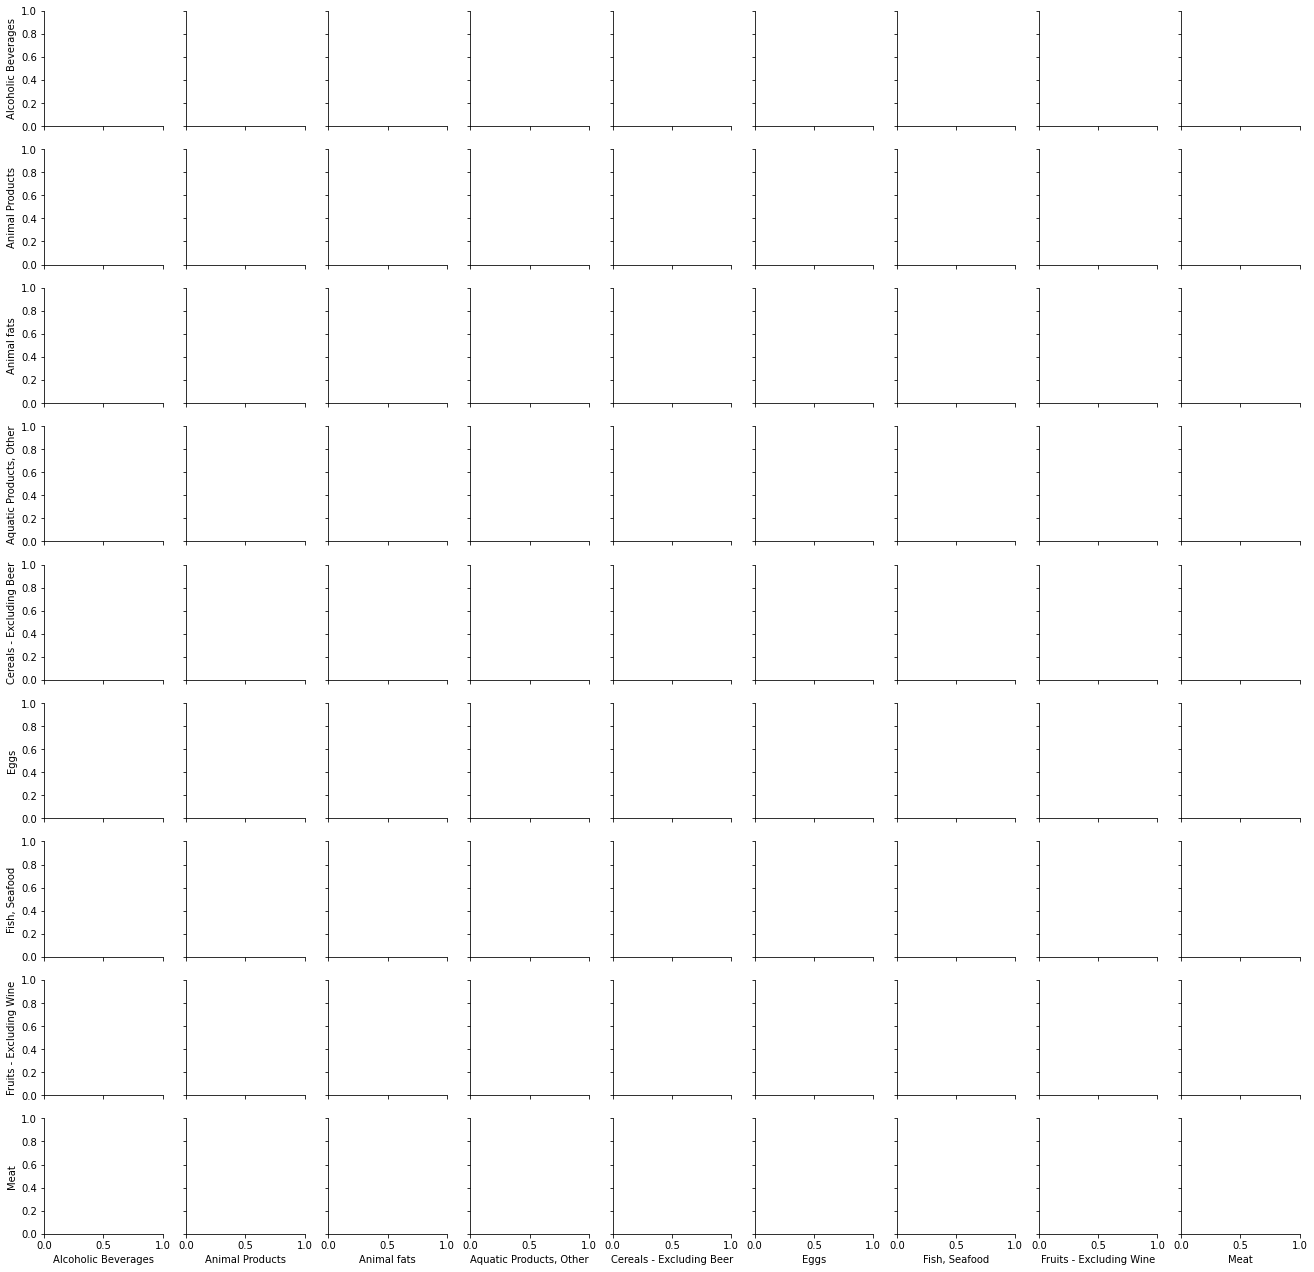

In [7]:
sns.pairplot(frame[frame.columns[0:10]])
plt.show()

In [ ]:
sns.pairplot(
    frame,
    x_vars=data_covid,
    y_vars=data_food,
)


In [50]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Deaths_percent', 'Recovered_percent', 'Confirmed_finish']

frame_cov = frame[data_covid].sort_values("Confirmed", ascending=True)
frame_food = frame.drop(columns=data_covid + ["Country"])

(array([76., 20., 21., 10.,  8., 10.,  6.,  3.,  1.,  4.]),
 array([3.45208506e-04, 4.74289845e-01, 9.48234482e-01, 1.42217912e+00,
        1.89612376e+00, 2.37006839e+00, 2.84401303e+00, 3.31795767e+00,
        3.79190230e+00, 4.26584694e+00, 4.73979158e+00]),
 <BarContainer object of 10 artists>)

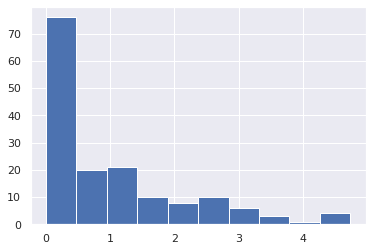

In [51]:
a = plt.hist(frame_cov["Confirmed"])
a

In [52]:
inds = []
prec = 0
grouped_index = []
cpt = 0
fus = []
for i in a[0]:
    if cpt < 3:
        fus += list(frame_cov[int(prec):int(prec+i)].index.values)
    cpt += 1
    #print(i)
    print(frame_cov[int(prec):int(prec+i)].index.values)
    grouped_index.append(frame_cov[int(prec):int(prec+i)].index.values)    
    prec += i
    
grouped_index[0 : 3] = [reduce(lambda i, j: np.array(list(i) + list(j)), grouped_index[0 : 3])] 
#grouped_index[1 : ] = [reduce(lambda i, j: np.array(list(i) + list(j)), grouped_index[1 : ])] 
grouped_index

[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132]
[154 106  47  45 115  40  86  46  63  37  68  60  78 153 107  58 100   9
 103 144]
[ 70 133 119  84  43  56  65   1  39  15  17  13 140  42  71 126  72  90
 157 135  67]
[ 77 158  21  66  87  97 137  23  10 145]
[125 122  74 159  35  95 123  18]
[114  55  31  33   8 116 124 108 138  20]
[120  83   5 141 146  51]
[161 118  73]
[6]
[ 38  91 102  14]


[array([ 85, 160, 166,  24, 139, 150,  49, 112, 149,  30, 167,  28,  22,
        101,  96,  16, 136,  89,  93,  59, 113, 151, 143, 128, 156,  99,
        110, 127,   3, 104,  82, 169,  92,  36, 130,  34,  64, 142,  25,
        111,  12,  48, 168,  41, 134,  88,  76, 129,  61,  27,   7,  44,
          0, 162, 148,  62,  79,   4,  54,  94,   2,  57, 117,  98,  69,
        163,  11,  32, 165,  75,  50, 121,  19,  53, 152, 132, 154, 106,
         47,  45, 115,  40,  86,  46,  63,  37,  68,  60,  78, 153, 107,
         58, 100,   9, 103, 144,  70, 133, 119,  84,  43,  56,  65,   1,
         39,  15,  17,  13, 140,  42,  71, 126,  72,  90, 157, 135,  67]),
 array([ 77, 158,  21,  66,  87,  97, 137,  23,  10, 145]),
 array([125, 122,  74, 159,  35,  95, 123,  18]),
 array([114,  55,  31,  33,   8, 116, 124, 108, 138,  20]),
 array([120,  83,   5, 141, 146,  51]),
 array([161, 118,  73]),
 array([6]),
 array([ 38,  91, 102,  14])]

In [11]:
def entity_distance(ent1, ent2):
    cent1 = np.mean(ent1)
    cent2 = np.mean(ent2)
    print(cent1, cent2)
    return np.linalg.norm(cent1-cent2)

In [12]:
distances = np.ones((len(grouped_index), len(grouped_index)), dtype=np.float)

for i in range(len(grouped_index)):
    for j in range(len(grouped_index)):
        if i < j:
            continue
        distances[i, j] = entity_distance(frame_food.loc[grouped_index[i]], frame_food.loc[grouped_index[j]])

for i in range(len(grouped_index)):
    for j in range(len(grouped_index)):
        if i < j:
            distances[i, j] = distances[j, i]
pd.DataFrame(distances)

Alcoholic Beverages          0.001503
Animal Products             18.975871
Animal fats                  3.385775
Aquatic Products, Other      0.000623
Cereals - Excluding Beer     5.155005
Eggs                         0.853138
Fish, Seafood                0.839537
Fruits - Excluding Wine      0.591726
Meat                         9.045454
Miscellaneous                0.054101
Milk - Excluding Butter      4.682078
Offals                       0.168855
Oilcrops                     3.636817
Pulses                       0.316388
Spices                       0.305966
Starchy Roots                0.286726
Stimulants                   0.523695
Sugar Crops                  0.005661
Sugar & Sweeteners           0.001129
Treenuts                     0.618996
Vegetal Products            31.024542
Vegetable Oils              19.220181
Vegetables                   0.306246
Obesity                     16.041880
dtype: float64 Alcoholic Beverages          0.001503
Animal Products             18.9758

0          1          2          3          4          5          6          7
0   0.000000  13.662098  15.276177  11.868713  13.493542  13.852184  18.897749  19.515472
1  13.662098   0.000000   7.701040   4.665243   4.103854   6.129916  12.725420   9.351109
2  15.276177   7.701040   0.000000   5.590420   7.727876  13.199761   5.535124   4.872061
3  11.868713   4.665243   5.590420   0.000000   4.758706   8.812049  10.366203   8.703487
4  13.493542   4.103854   7.727876   4.758706   0.000000   6.621993  12.265623   9.489982
5  13.852184   6.129916  13.199761   8.812049   6.621993   0.000000  18.012355  14.859895
6  18.897749  12.725420   5.535124  10.366203  12.265623  18.012355   0.000000   6.129539
7  19.515472   9.351109   4.872061   8.703487   9.489982  14.859895   6.129539   0.000000

In [13]:
frame_food.loc[grouped_index[i]]

Alcoholic Beverages  Animal Products  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetal Products  Vegetable Oils  Vegetables  Obesity
38                   0.0          25.1685       9.7011                      0.0                    1.1998  0.8222         0.3000                   0.1870   8.6212         0.0212                   5.6463  0.0776    0.4941  0.0353  0.0635         0.0565      0.9563          0.0                 0.0    0.4164           24.8333         21.2267      0.1729     28.5
91                   0.0          32.4517       6.4786                      0.0                    1.8437  1.6645         0.6987                   0.3256  16.3118         0.0658                   7.2286  0.0658    0.6402  0.0146  0.1646         0.0329      3.3838          0.0                 0.0    0.1280           17.5519         10.6855      0.2634     24.2
102                  0.0          32.7855       3.8887                      0.0                    3.7312  1.1566         0.3473                   0.3688  14.7778         0.1003                  12.5363  0.0752    0.5837  0.0788  0.0430         0.0251      2.5531          0.0                 0.0    0.8415           17.2163          8.6332      0.2578     24.9
14                   0.0          26.7378      12.6234                      0.0                    1.3531  1.1703         0.6188                   0.2373   5.6817         0.0000                   6.5057  0.1379    0.5226  0.0353  0.0994         0.0770      0.0834          0.0                 0.0    1.2056           23.2622         19.3504      0.2982     24.5

Confirmed Vegetal Products


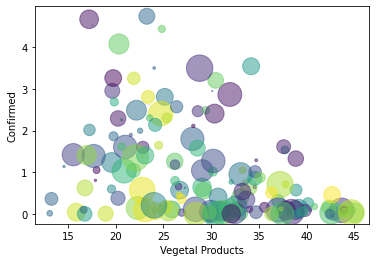

Confirmed Animal fats


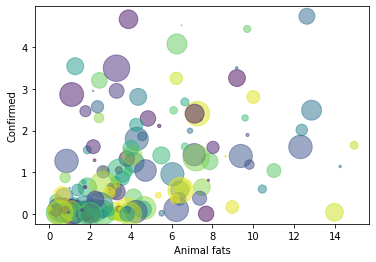

Confirmed Cereals - Excluding Beer


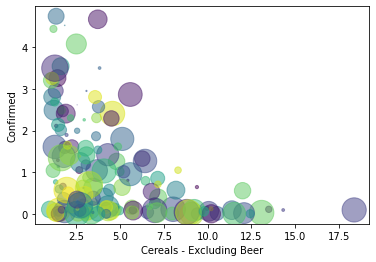

Confirmed Starchy Roots


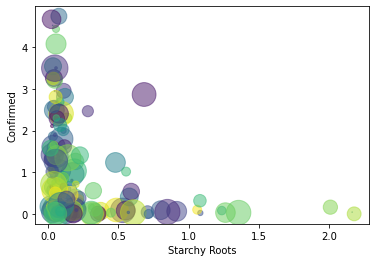

Confirmed Sugar Crops


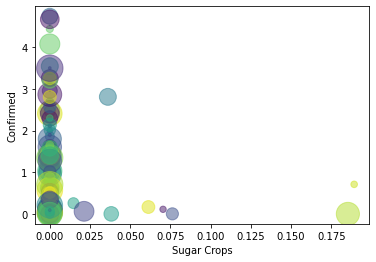

Confirmed Fruits - Excluding Wine


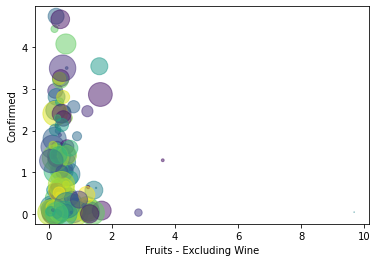

Confirmed Oilcrops


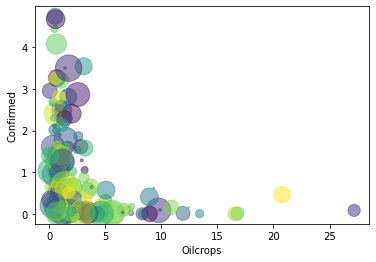

Confirmed Vegetables


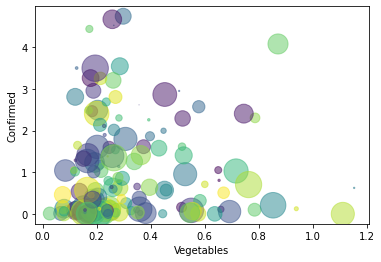

Confirmed Offals


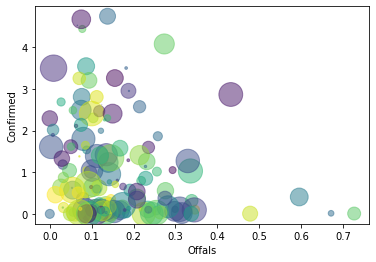

Confirmed Spices


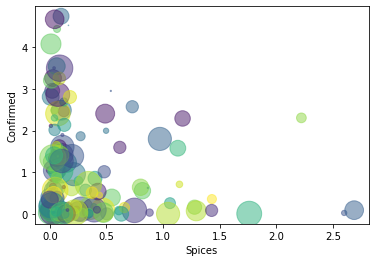

Confirmed Animal Products


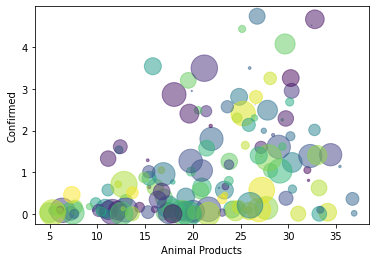

Confirmed Stimulants


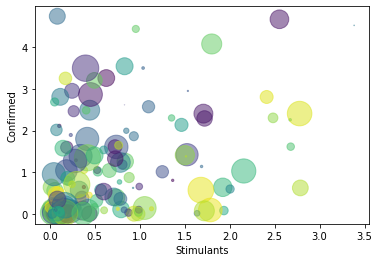

Confirmed Eggs


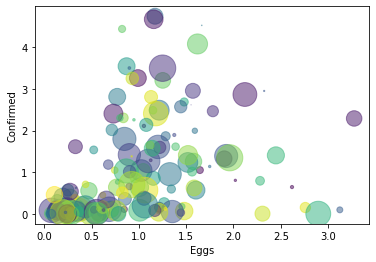

Confirmed Milk - Excluding Butter


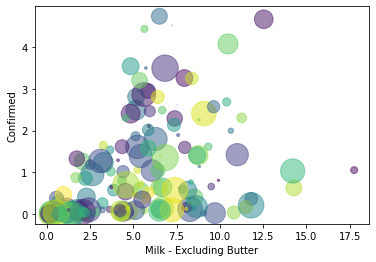

Confirmed Miscellaneous


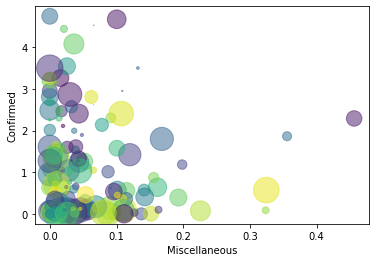

Confirmed Meat


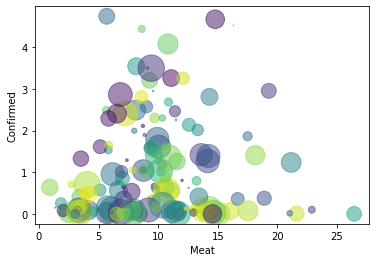

Confirmed Sugar & Sweeteners


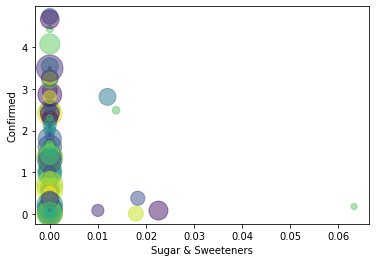

Confirmed Country


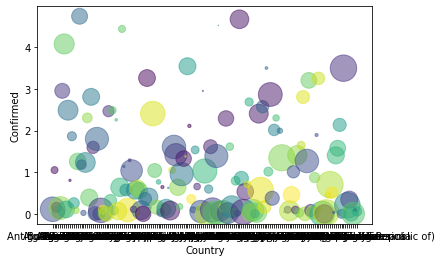

Confirmed Pulses


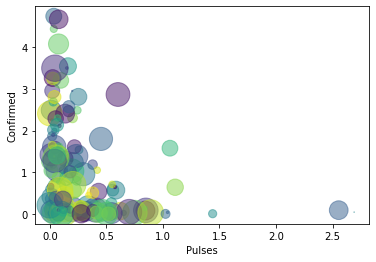

Confirmed Population


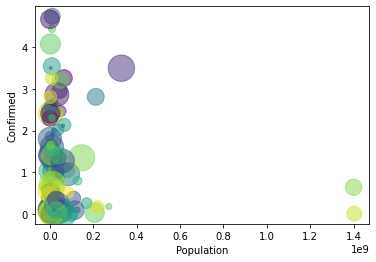

Confirmed Obesity


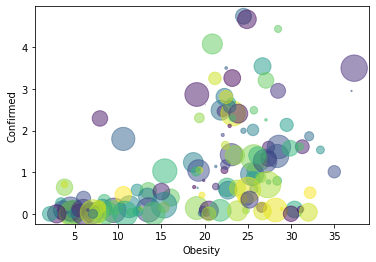

Confirmed Aquatic Products, Other


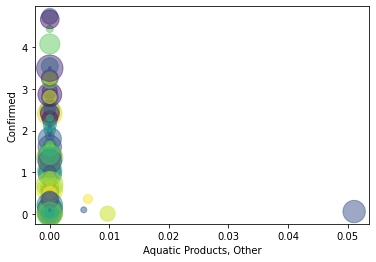

Confirmed Alcoholic Beverages


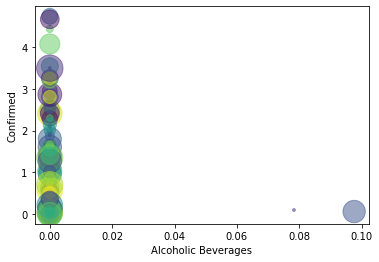

Confirmed Vegetable Oils


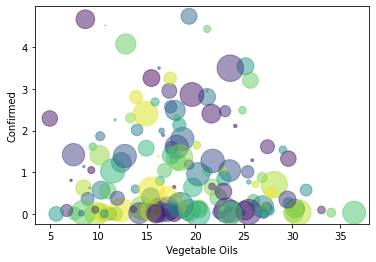

Confirmed Fish, Seafood


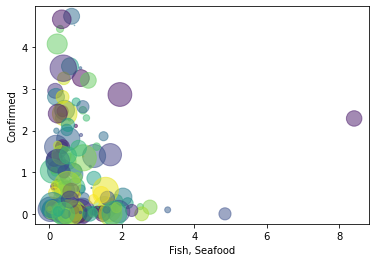

Confirmed Treenuts


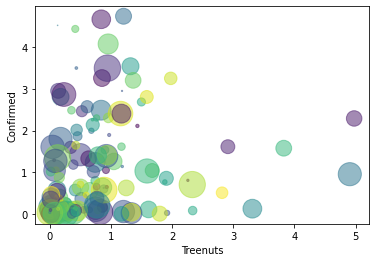

Deaths Vegetal Products


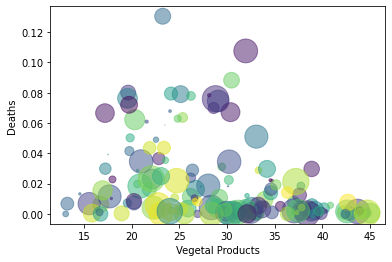

Deaths Animal fats


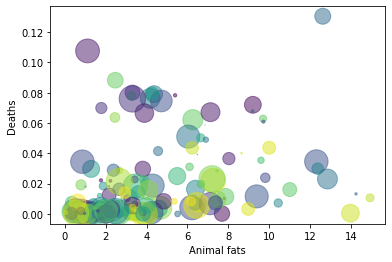

Deaths Cereals - Excluding Beer


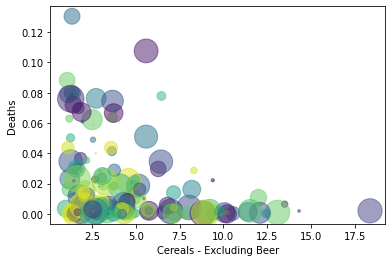

Deaths Starchy Roots


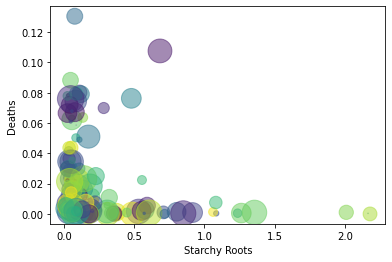

Deaths Sugar Crops


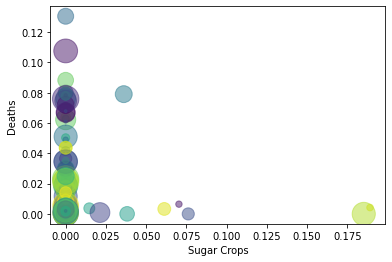

Deaths Fruits - Excluding Wine


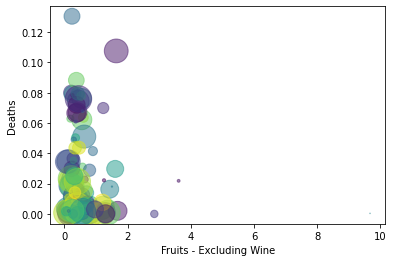

Deaths Oilcrops


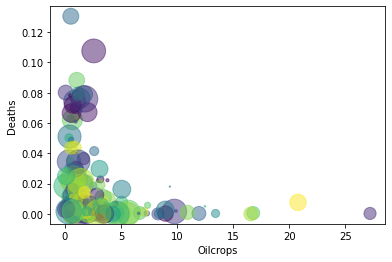

Deaths Vegetables


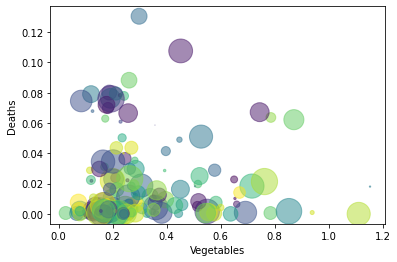

Deaths Offals


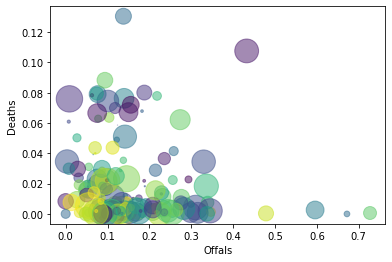

Deaths Spices


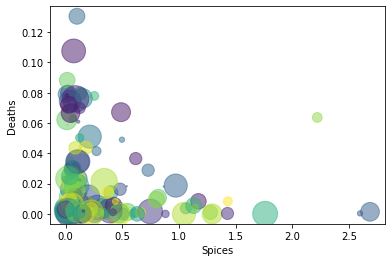

Deaths Animal Products


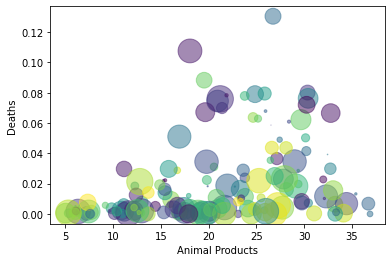

Deaths Stimulants


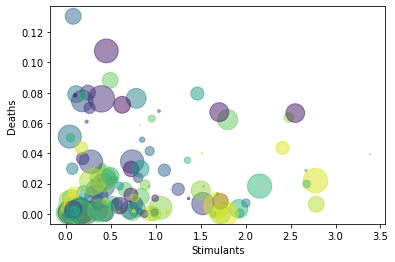

Deaths Eggs


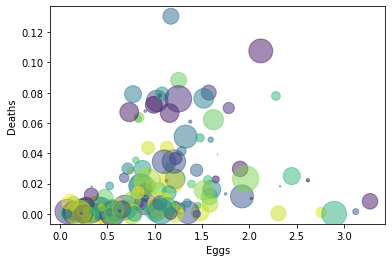

Deaths Milk - Excluding Butter


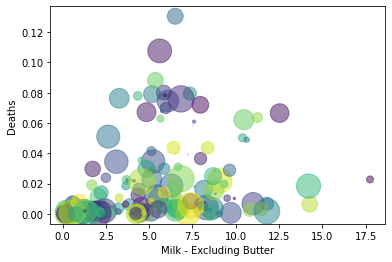

Deaths Miscellaneous


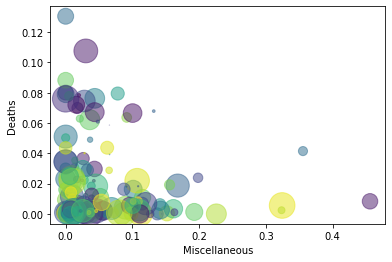

Deaths Meat


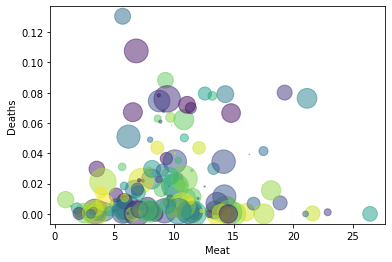

Deaths Sugar & Sweeteners


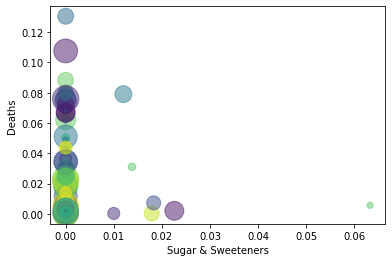

Deaths Country


KeyboardInterrupt: 

In [14]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Confirmed_finish', 'Deaths_percent', 'Recovered_percent',]
data_food =  set(frame.columns) - set(data_covid)

colors=np.random.rand(len(frame))
area= np.pi * (15 * np.random.rand(len(frame)))**2

for malade in data_covid:
    for food in data_food:
        print(malade, food)
        fig, ax = plt.subplots() 
        ax.scatter(y= frame[malade], x=frame[food], s=area, c=colors, alpha=0.5)
        ax.set_ylabel(malade)
        ax.set_xlabel(food)
        plt.show()


In [15]:
data_food

{'Alcoholic Beverages',
 'Animal Products',
 'Animal fats',
 'Aquatic Products, Other',
 'Cereals - Excluding Beer',
 'Country',
 'Eggs',
 'Fish, Seafood',
 'Fruits - Excluding Wine',
 'Meat',
 'Milk - Excluding Butter',
 'Miscellaneous',
 'Obesity',
 'Offals',
 'Oilcrops',
 'Population',
 'Pulses',
 'Spices',
 'Starchy Roots',
 'Stimulants',
 'Sugar & Sweeteners',
 'Sugar Crops',
 'Treenuts',
 'Vegetable Oils',
 'Vegetables',
 'Vegetal Products'}

In [57]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Confirmed_finish', 'Deaths_percent', 'Recovered_percent',]

matrix = frame.drop(columns=(['Population','Country'])).corr()[data_covid]

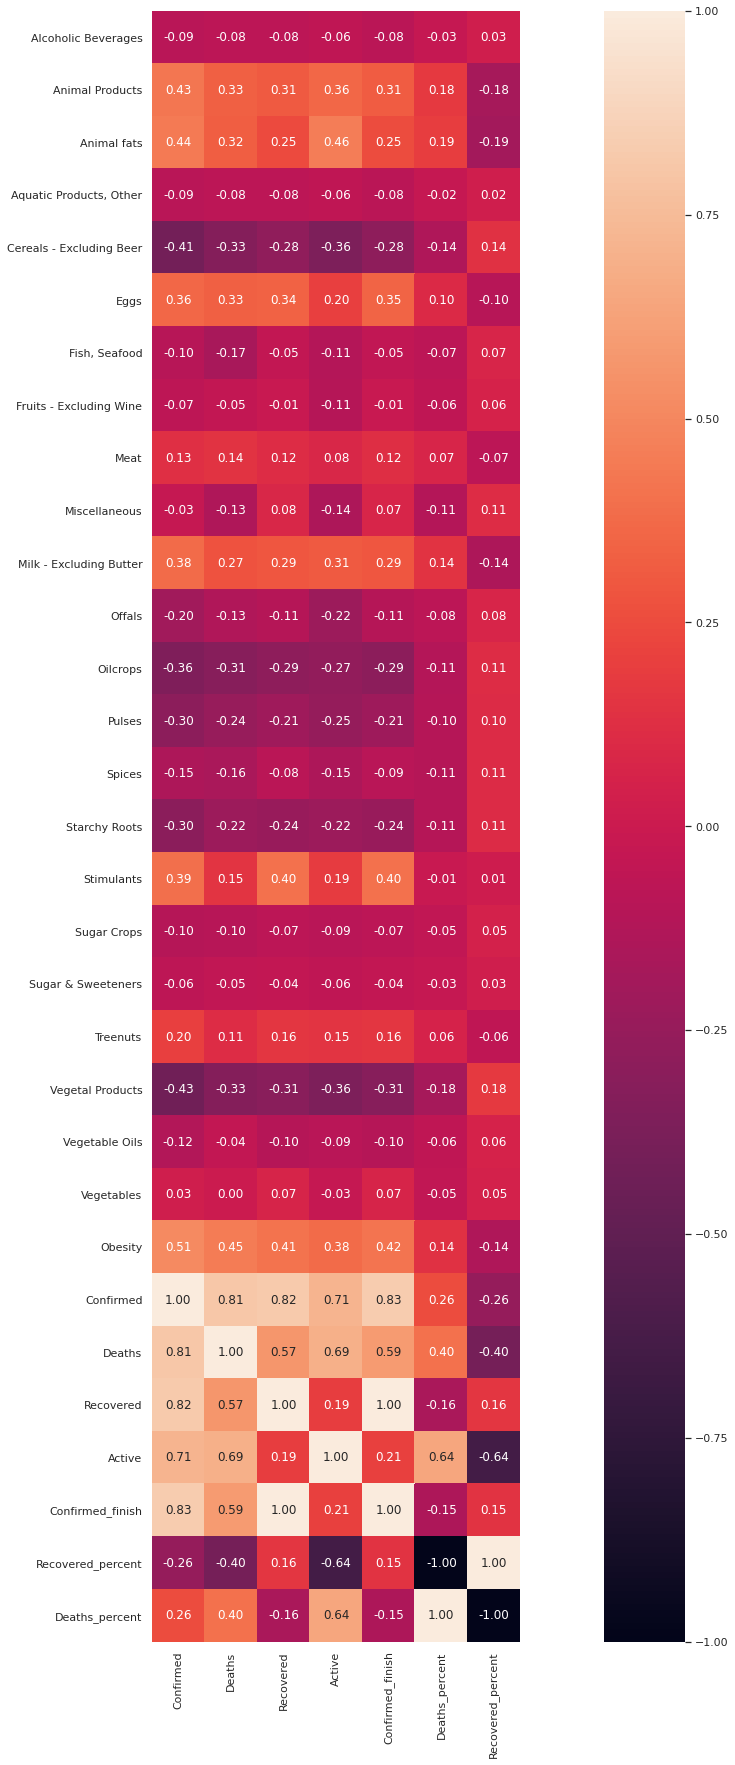

In [58]:
#Affichage
#plot correlation seaborn
from matplotlib import pyplot
import seaborn

a4_dims = (30, 30)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(matrix, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=frame.drop(columns=(['Population','Country'])).corr().columns, xticklabels=matrix.columns)



In [59]:
frame

Country  Alcoholic Beverages  Animal Products  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetal Products  Vegetable Oils  Vegetables  Obesity  Confirmed    Deaths  Recovered    Active    Population  Confirmed_finish  Recovered_percent  Deaths_percent
0                           Afghanistan               0.0000          21.6397       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980       0.0000              0.0000    0.7513           28.3684         17.0831      0.3593      4.5   0.112646  0.004226   0.090667  0.017753  3.892800e+07          0.094893          95.546833        4.453167
1                               Albania               0.0000          32.0002       3.4172                   0.0000                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148  0.0000         0.0510      0.5270       0.0000              0.0000    0.9181           17.9998          9.2443      0.6503     22.3   1.051339  0.022763   0.500916  0.527660  2.838000e+06          0.523679          95.653344        4.346656
2                               Algeria               0.0000          14.4175       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886       0.0000              0.0000    0.8595           35.5857         27.3606      0.5145     26.6   0.159229  0.004973   0.104439  0.049816  4.435700e+07          0.109412          95.454545        4.545455
3                                Angola               0.0000          15.3041       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128       0.0000              0.0000    0.0308           34.7010         22.4638      0.1231      6.8   0.042808  0.001021   0.020365  0.021422  3.252200e+07          0.021386          95.226456        4.773544
4                   Antigua and Barbuda               0.0000          27.7033       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549       0.0000              0.0000    0.2020           22.2995         14.4436      0.2469     19.1   0.141837  0.004082   0.129592  0.008163  9.800000e+04          0.133673          96.946565        3.053435
5                             Argentina               0.0000          30.3572       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366           19.6449         17.3147      0.1878     28.5   2.951577  0.080100   2.548591  0.322886  4.537700e+07          2.628691          96.952854        3.047146
6                               Armenia               0.0000          29.6642       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774  0.0103         0.0567      1.8002       0.0000              0.0000    0.9542           20.3384         12.8127      0.8717     20.9   4.075068  0.062212   2.708694  1.304161  2.956000e+06          2.770907          97

0.40053764933827873
[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144  70 133 119  84  43  56  65   1  39  15  17  13
 140  42  71 126  72  90 157 135  67]


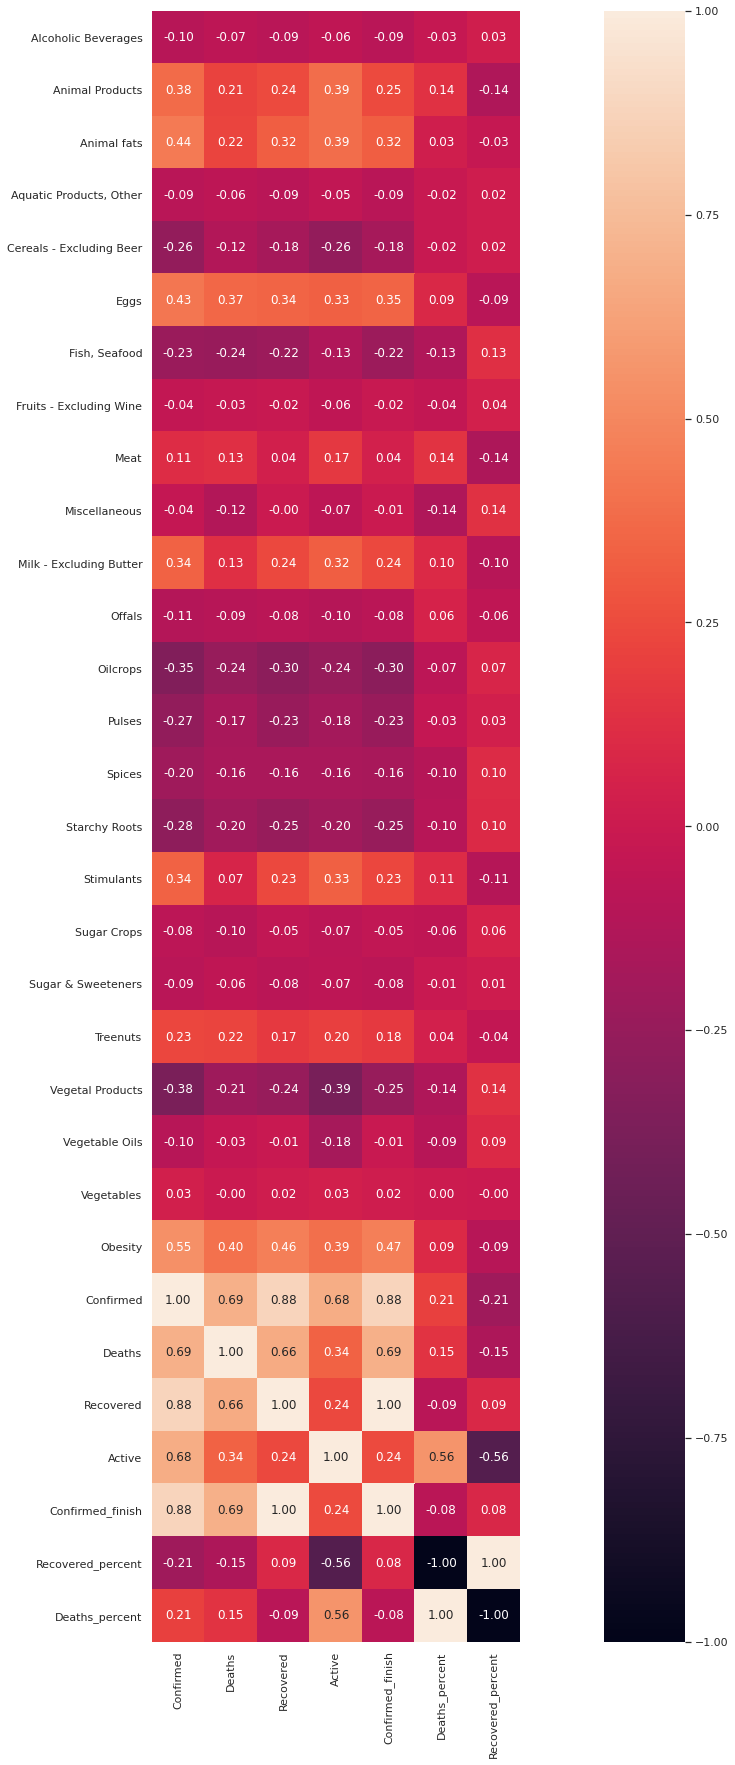

1.674014310529677
[ 77 158  21  66  87  97 137  23  10 145]


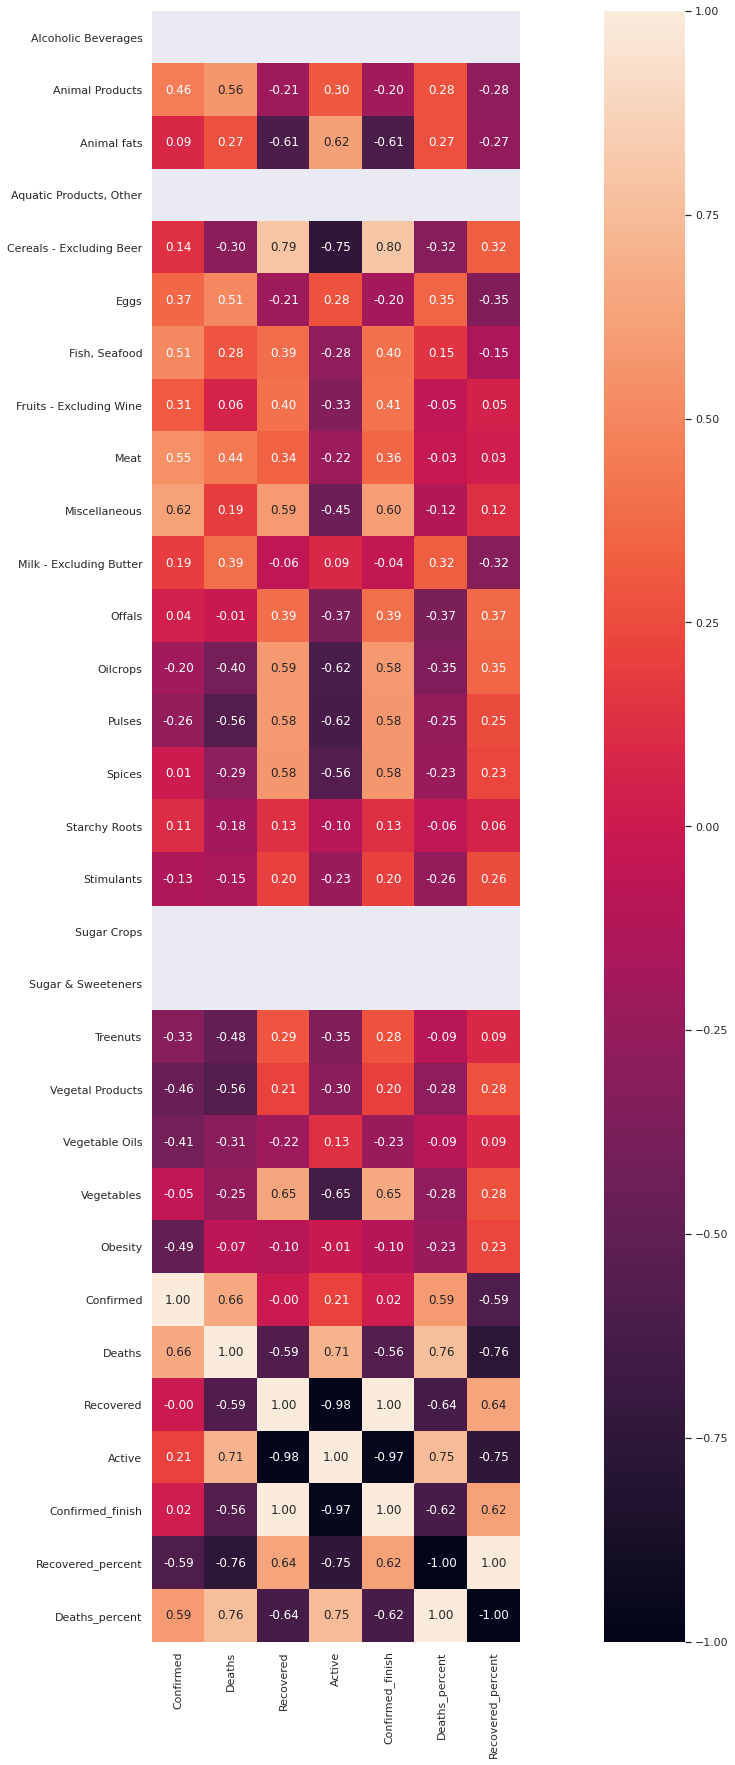

2.1755808136444674
[125 122  74 159  35  95 123  18]


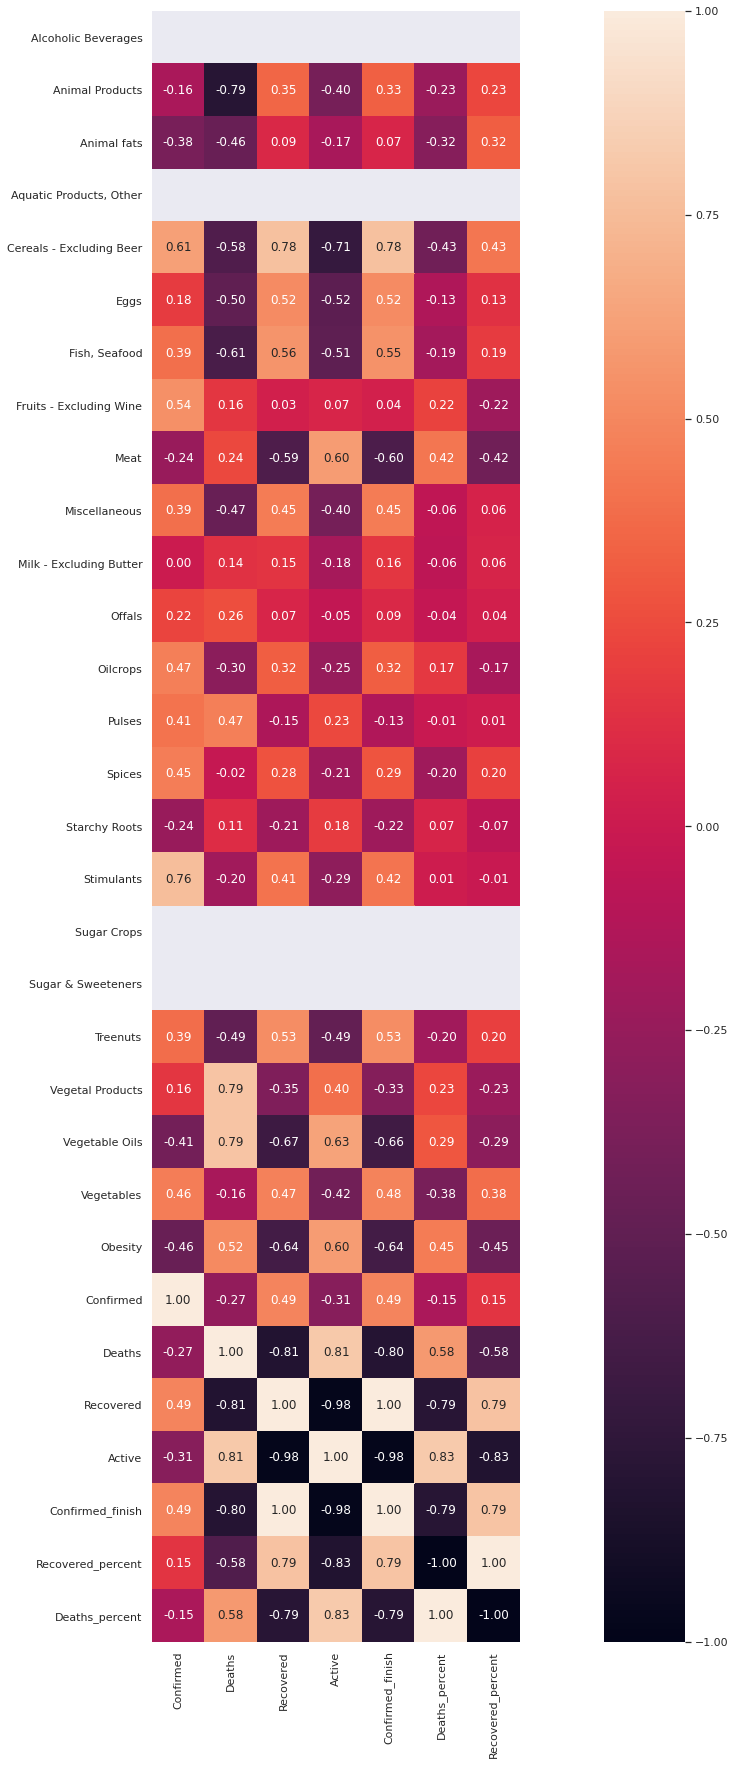

2.5729089386356727
[114  55  31  33   8 116 124 108 138  20]


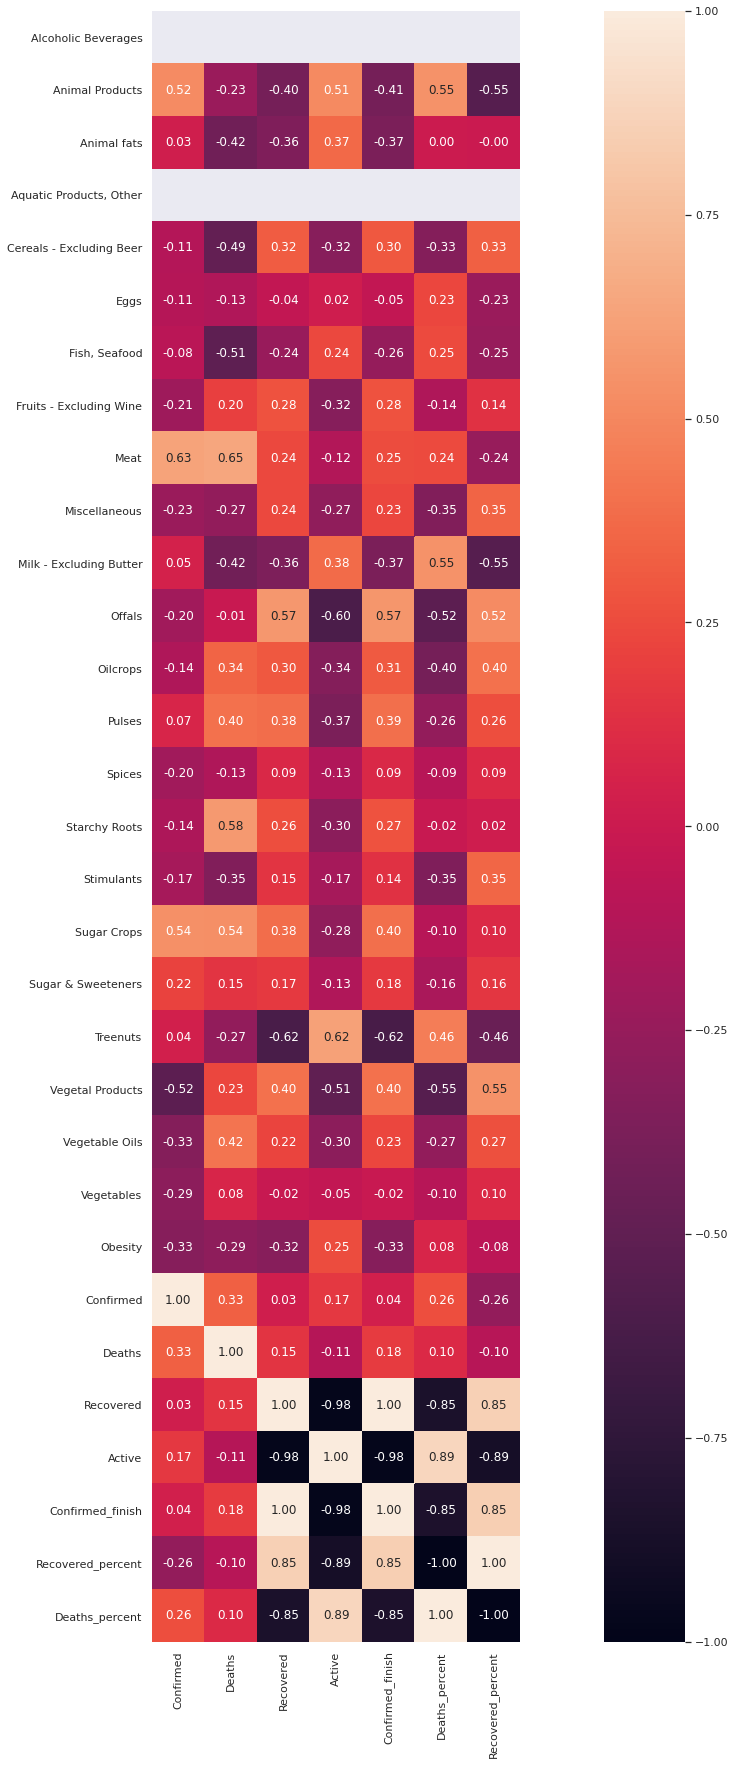

3.0791183691140103
[120  83   5 141 146  51]


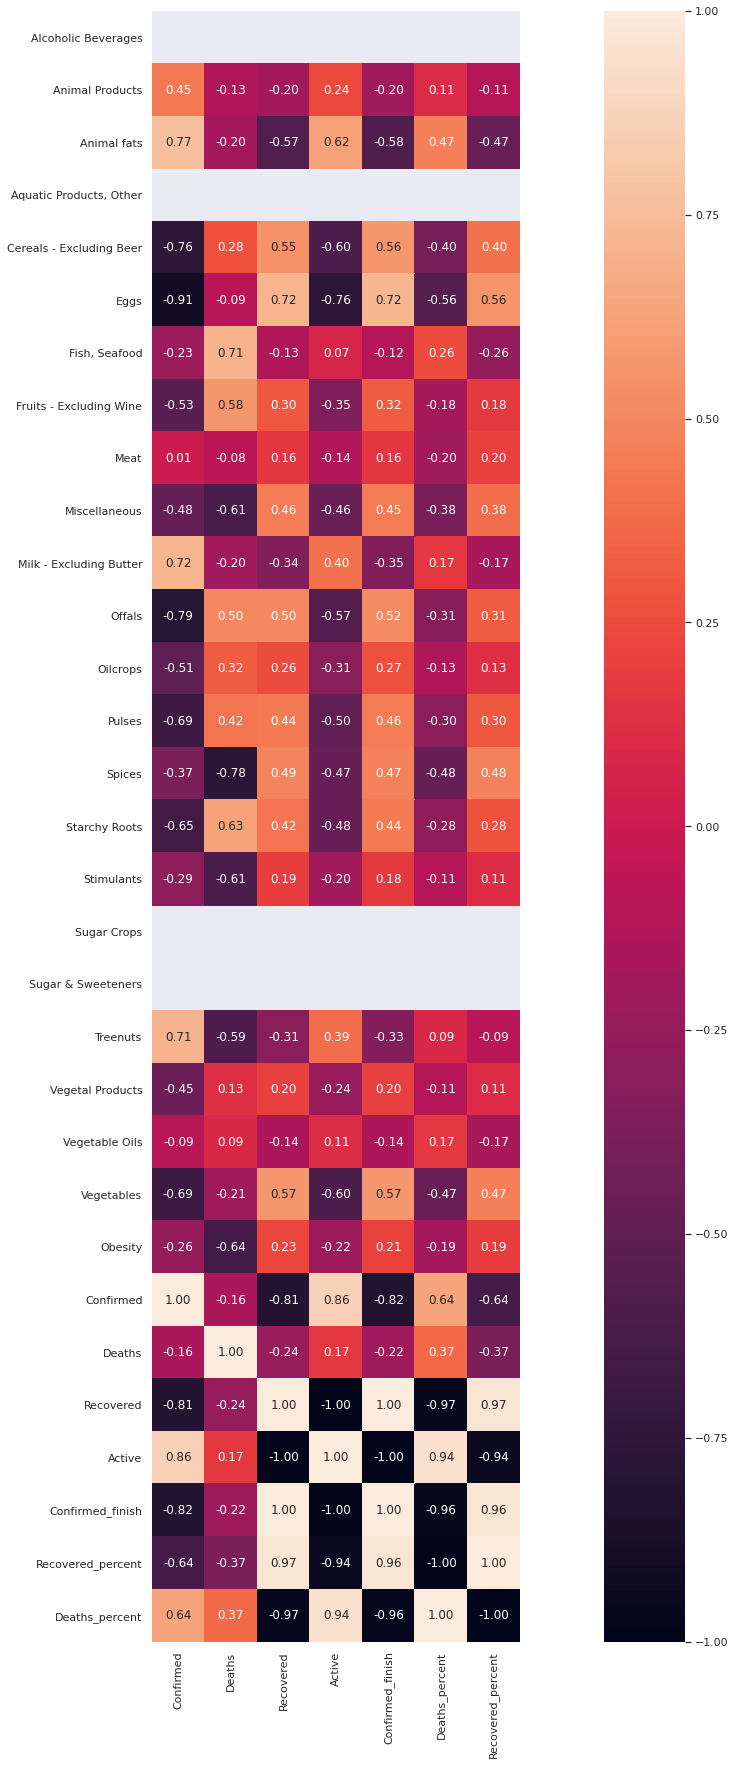

3.51123515506004
[161 118  73]


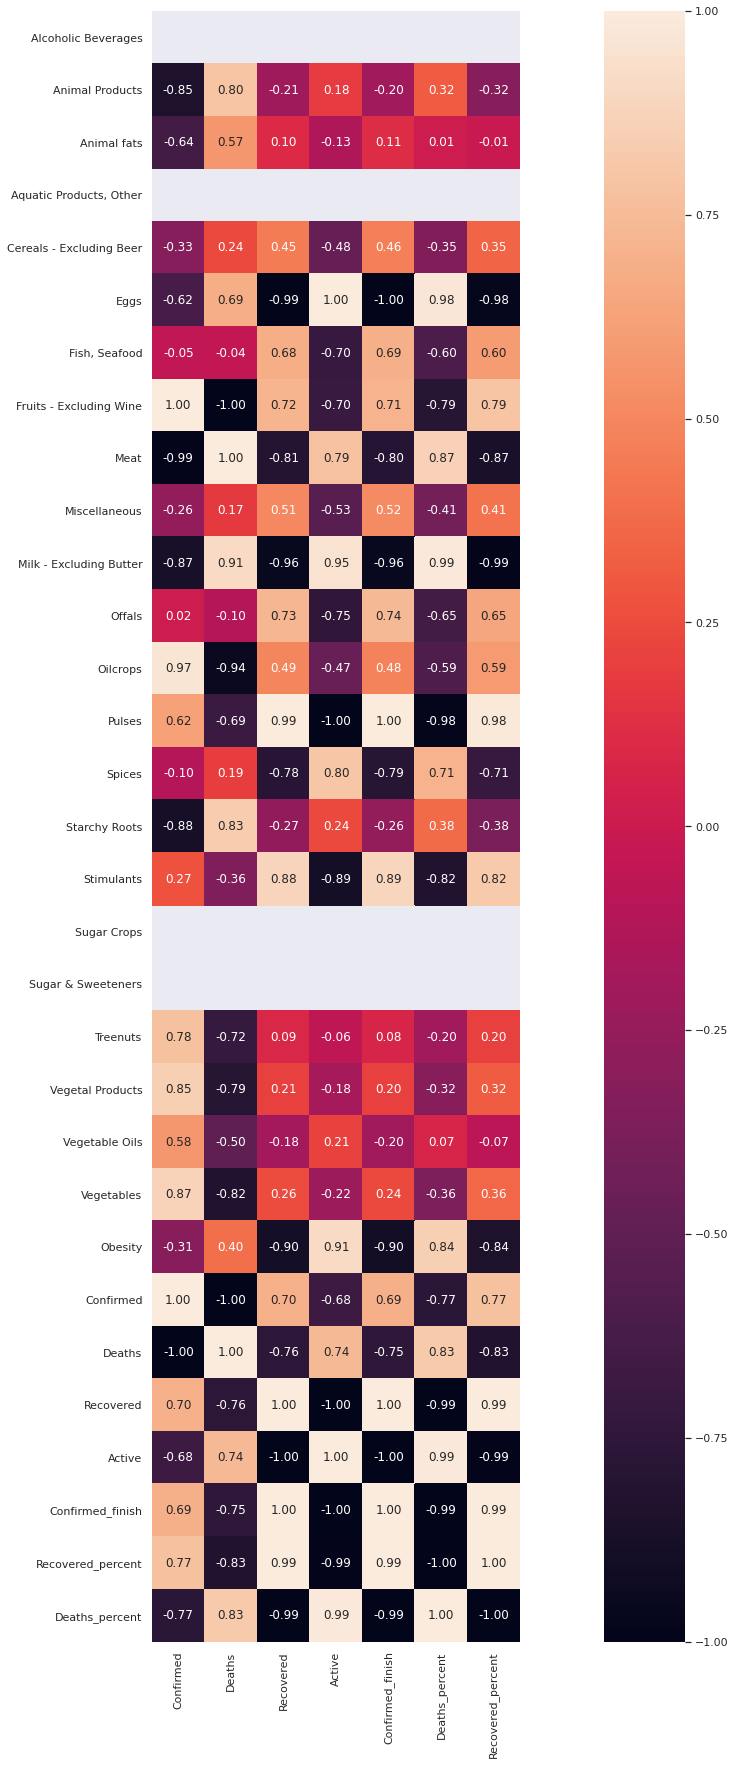

4.07506765899865
[6]


/home/brami/env2/lib/python3.8/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/brami/env2/lib/python3.8/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


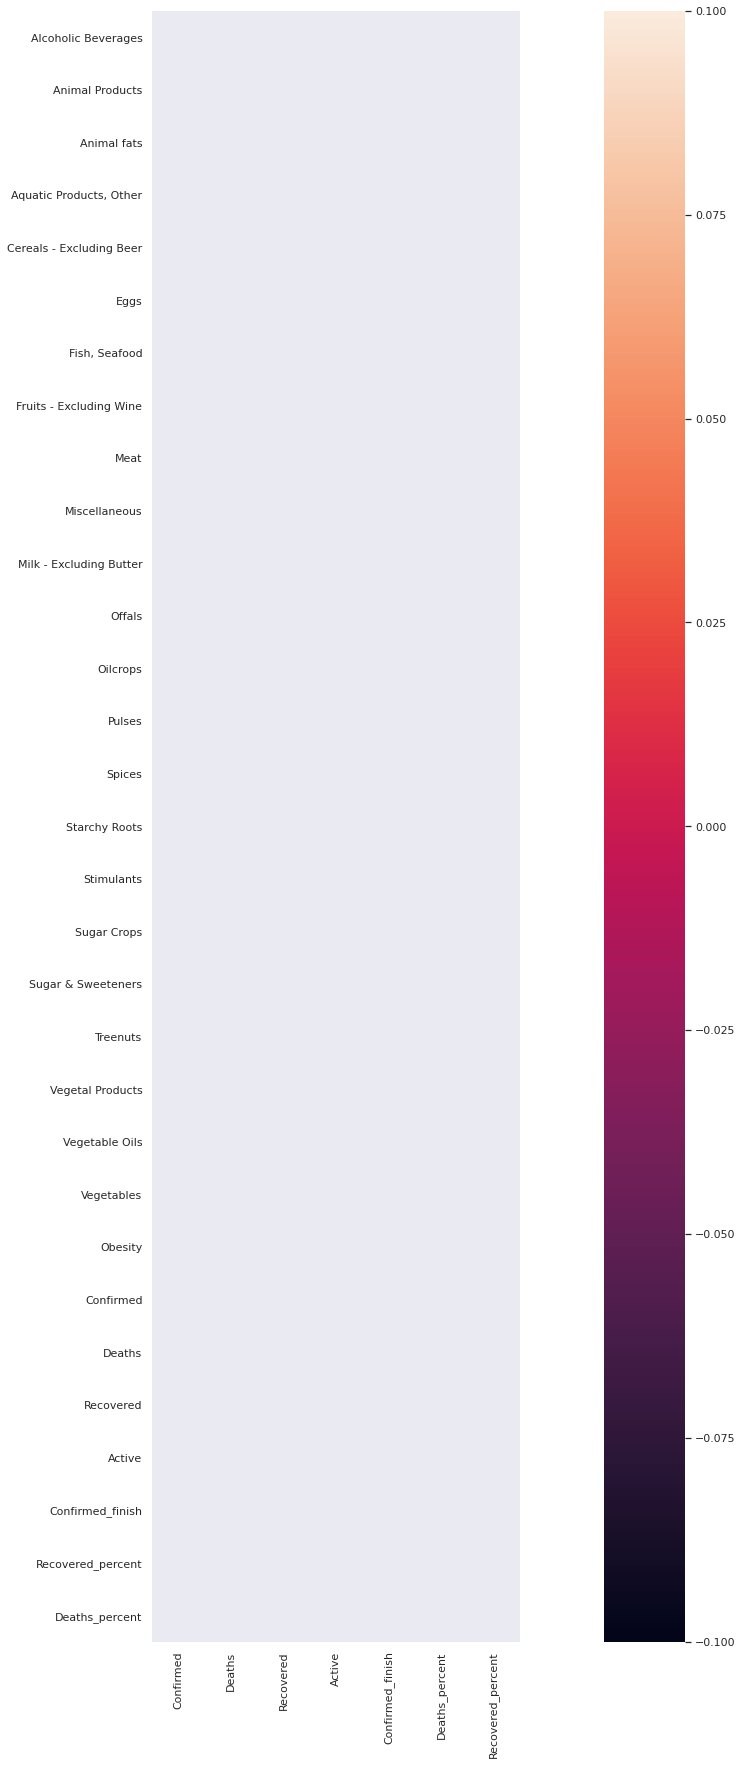

4.590868395039222
[ 38  91 102  14]


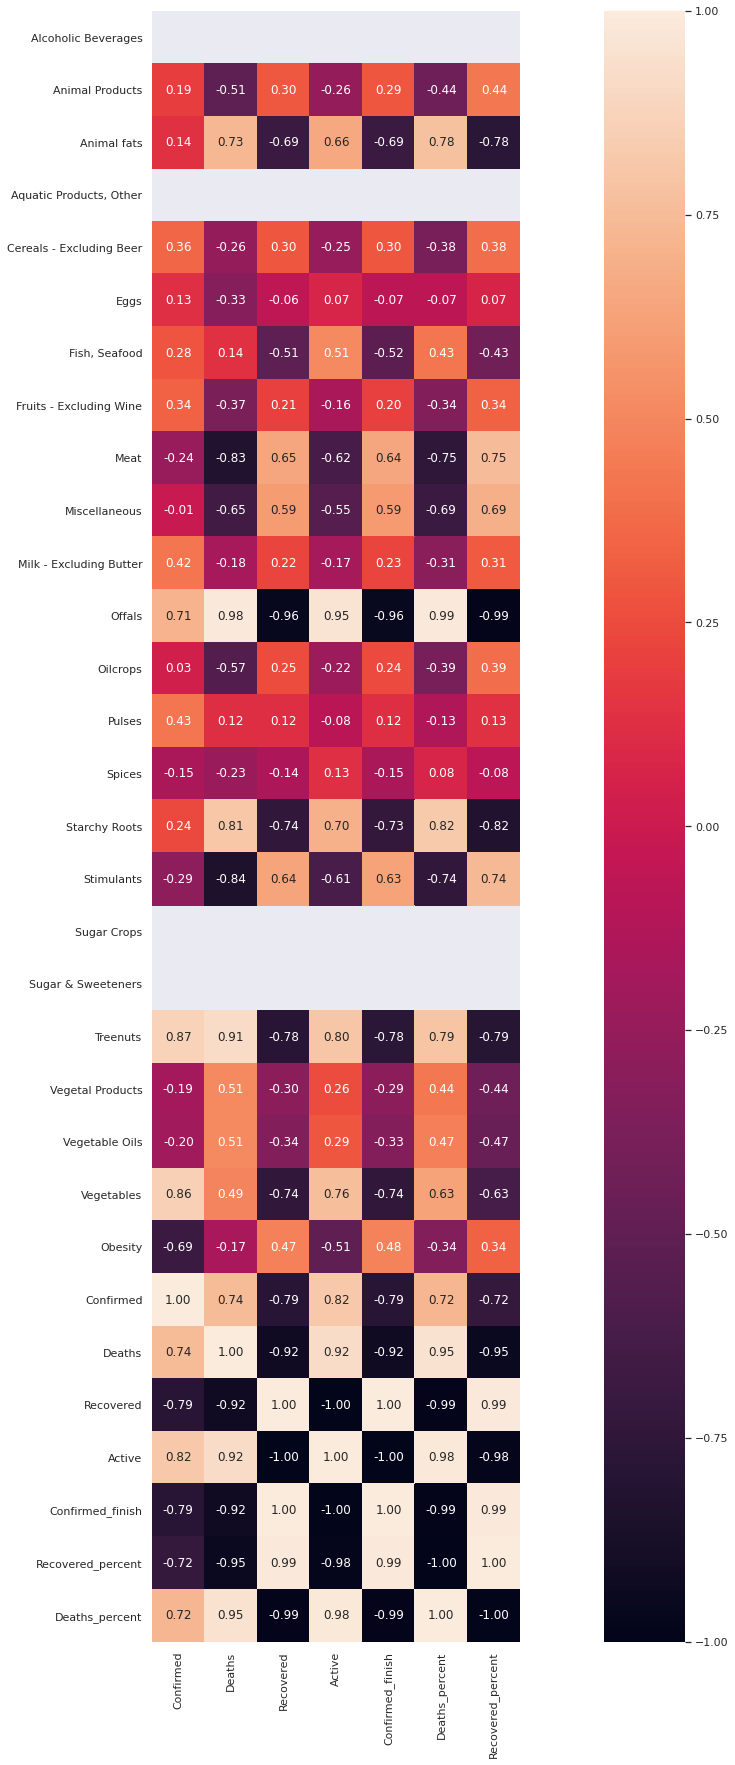

In [60]:
for ind in grouped_index:
    big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
    print(np.mean(frame.loc[ind]["Confirmed"]))
    print(ind)
    matrix = big_mat[data_covid]
    a4_dims = (30, 30)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(matrix, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=big_mat.columns, xticklabels=matrix.columns)
    plt.show()

In [19]:
frame_food = frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Obesity",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])


In [20]:
frame_food

Alcoholic Beverages  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetable Oils  Vegetables  Recovered_percent
0                 0.0000       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980       0.0000              0.0000    0.7513         17.0831      0.3593          95.546833
1                 0.0000       3.4172                   0.0000                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148  0.0000         0.0510      0.5270       0.0000              0.0000    0.9181          9.2443      0.6503          95.653344
2                 0.0000       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886       0.0000              0.0000    0.8595         27.3606      0.5145          95.454545
3                 0.0000       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128       0.0000              0.0000    0.0308         22.4638      0.1231          95.226456
4                 0.0000       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549       0.0000              0.0000    0.2020         14.4436      0.2469          96.946565
5                 0.0000       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366         17.3147      0.1878          96.952854
6                 0.0000       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774  0.0103         0.0567      1.8002       0.0000              0.0000    0.9542         12.8127      0.8717          97.754798
7                 0.0000       4.6030                   0.0000                    0.9908  0.7017         0.4515                   0.4028  11.6002         0.0520                   6.5196  0.2339    1.2929  0.0260  0.1007         0.0422      0.7926       0.0000              0.0000    1.6145         20.3612      0.2144          96.566215
8                 0.0000      12.8517                   0.0000                    1.2297  1.2147         0.4259                   0.2249   8.1099         0.0000                   5.1497  0.0750    1.1367  0.0120  0.1020         0.0450      0.4439       0.0000              0.0000    0.8398         17.9323      0.2039          98.581413
9                 0.0000       7.7987                   0.0000                    5.4481  2.0197         0.2122                   0.5940  11.9993         0.0170                   9.9202  0.1612    0.1867  0.0255  0.0170         0.1697      1.3663       0.0000              0.0000    2.2573          7.1538      0.6534          98.258399
10                0.0000       4.5600                   0.0000                    3.6327  1.2829         1.4991                   0.8995  17.4941         0.3556                   5.1318  0.2580    2.6077  0.0209  0.2719         0.0349      0.9343       0.0000              0.0000    0.4532         

for i in frame_food.columns:
    print(i)
    frame_food[i].hist()
    plt.show()

In [21]:
#supprimer valeur abberante:
from scipy import stats
z_scores = stats.zscore(frame_food)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
frame_food = frame_food[filtered_entries]

for i in new_df.columns:
    print(i)
    new_df[i].hist()
    plt.show()

In [22]:
frame_food

Alcoholic Beverages  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetable Oils  Vegetables  Recovered_percent
0                    0.0       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980       0.0000              0.0000    0.7513         17.0831      0.3593          95.546833
2                    0.0       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886       0.0000              0.0000    0.8595         27.3606      0.5145          95.454545
3                    0.0       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128       0.0000              0.0000    0.0308         22.4638      0.1231          95.226456
4                    0.0       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549       0.0000              0.0000    0.2020         14.4436      0.2469          96.946565
5                    0.0       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366         17.3147      0.1878          96.952854
6                    0.0       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774  0.0103         0.0567      1.8002       0.0000              0.0000    0.9542         12.8127      0.8717          97.754798
7                    0.0       4.6030                   0.0000                    0.9908  0.7017         0.4515                   0.4028  11.6002         0.0520                   6.5196  0.2339    1.2929  0.0260  0.1007         0.0422      0.7926       0.0000              0.0000    1.6145         20.3612      0.2144          96.566215
8                    0.0      12.8517                   0.0000                    1.2297  1.2147         0.4259                   0.2249   8.1099         0.0000                   5.1497  0.0750    1.1367  0.0120  0.1020         0.0450      0.4439       0.0000              0.0000    0.8398         17.9323      0.2039          98.581413
9                    0.0       7.7987                   0.0000                    5.4481  2.0197         0.2122                   0.5940  11.9993         0.0170                   9.9202  0.1612    0.1867  0.0255  0.0170         0.1697      1.3663       0.0000              0.0000    2.2573          7.1538      0.6534          98.258399
11                   0.0       1.2369                   0.0000                    6.9946  1.2664         2.1646                   0.4270   1.8407         0.0147                   3.2249  0.1178    0.6332  0.5448  1.0602         0.2209      0.0295       0.0147              0.0000    0.2651         29.6422      0.3092          98.262076
13                   0.0       7.8662                   0.0000                    4.8075  1.5772         0.5151                   0.2316  11.5636         0.0519                   2.0644  0.2316    0.4392  0.0000  0.0160         0.1957      0.8385       0.0000              0.0000    1.0462         

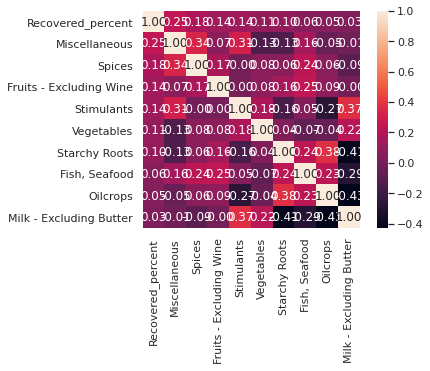

In [23]:
correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()


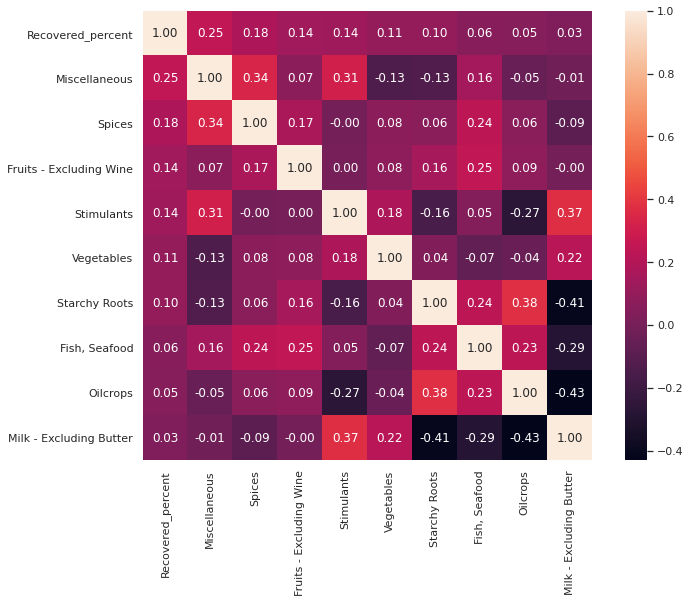

In [24]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


In [304]:
frame_food[columns[0:7]]

Recovered_percent  Miscellaneous  Spices  Fruits - Excluding Wine  Stimulants  Vegetables  Starchy Roots
0            95.546833         0.0163  0.2776                   0.4246      0.0980      0.3593         0.0490
2            95.454545         0.0439  0.1568                   0.5772      0.2886      0.5145         0.1129
3            95.226456         0.0308  0.0103                   0.3488      0.1128      0.1231         0.7078
4            96.946565         0.0898  0.3591                   1.2177      1.0549      0.2469         0.0449
5            96.952854         0.0000  0.0213                   0.2091      0.2475      0.1878         0.1110
6            97.754798         0.0361  0.0103                   0.5468      1.8002      0.8717         0.0567
7            96.566215         0.0520  0.1007                   0.4028      0.7926      0.2144         0.0422
8            98.581413         0.0000  0.1020                   0.2249      0.4439      0.2039         0.0450
9            98.258399         0.0170  0.0170                   0.5940      1.3663      0.6534         0.1697
11           98.262076         0.0147  1.0602                   0.4270      0.0295      0.3092         0.2209
13           98.926397         0.0519  0.0160                   0.2316      0.8385      0.3394         0.1957
15           96.402878         0.1984  0.0496                   0.3039      0.8062      0.2108         0.0310
17           93.023238         0.0436  0.1483                   0.5407      0.7849      0.1919         0.4796
19           99.560826         0.1927  0.5472                   0.1696      0.7399      0.1850         0.1927
20           96.983249         0.0000  0.0080                   0.2528      0.1164      0.1204         0.1204
21           92.773493         0.0262  0.6179                   0.2723      0.1885      0.2461         0.0367
22           97.322835         0.0148  0.0960                   0.0443      0.0222      0.0665         0.0369
23           98.915311         0.1679  0.9709                   0.1898      0.4161      0.3066         0.0949
25           98.026706         0.0280  0.7465                   0.7931      0.1213      0.5505         0.5319
27           96.829391         0.0102  0.0102                   0.4998      0.0408      0.0918         1.0609
30           94.814199         0.1517  0.0676                   0.2344      0.9362      0.5763         0.0565
31           97.019781         0.0177  0.1239                   1.2273      0.2655      0.1829         0.2832
32           97.321198         0.0530  0.0106                   0.8370      0.5191      0.5827         1.0806
33           98.010673         0.0138  0.0414                   0.5700      0.4045      0.1701         0.0506
34           99.381028         0.0091  0.6089                   0.5271      1.9357      0.3272         1.2359
35           98.440886         0.0000  0.0655                   0.2577      2.6726      0.3930         0.0393
36           98.206217         0.0139  0.0417                   0.6179      0.1458      0.5554         0.3749
37           98.011639         0.1614  0.0538                   0.3632      1.9236      0.2601         0.0404
38           98.199373         0.0212  0.0635                   0.1870      0.9563      0.1729         0.0565
40           98.912656         0.1413  0.3159                   0.1247      0.5653      0.4572         0.0333
41          100.000000         0.1123  0.4680                   1.1856      1.7846      0.2309         0.4867
43           92.485506         0.0280  0.0392                   0.4367      0.1848      0.0840         0.0840
44           93.981430         0.0088  0.2376                   0.7216      0.0792      0.6600         0.1936
45           96.945593         0.1012  0.0311                   1.4321      0.3269      0.4514         0.1401
47           97.998318         0.1151  0.8170                   0.4718      0.0575      0.1956         0.3222
49           94.117647         0.0262  0.1312

In [25]:
X = frame_food[columns[0:7]]
Y = X[name_y].values

a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

def denormalized(x):
    return (x / (b - a)) * (max_d - min_d) + min_d 



X = X.drop(name_y, axis = 1).values

Y = normalized_d
ind = Y != 0 

X = X[ind,]
Y = Y[ind]


a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

Y = normalized_d


X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)
normalized_d

Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')


array([ 81.17334313,  80.7831803 ,  79.81888554,  87.09099135,
        87.11757891,  90.50795904,  85.48298553,  94.00264069,
        92.63703464,  92.65257875,  95.46112969,  84.79244484,
        70.50433899,  98.14330244,  87.24608241,  69.44849516,
        88.68174714,  95.41425913,  91.65750242,  86.59561545,
        78.07598808,  87.4005273 ,  88.67482805,  91.58972248,
        97.38317095,  93.40853505,  92.41642142,  91.59380632,
        92.38748744,  95.40303529, 100.        ,  68.23097066,
        74.55528961,  87.08688412,  91.53748798,  75.13117451,
        89.91221179,   0.        ,  86.06001512,  95.23321421,
        90.02770884,  77.64847702, 100.        ,  84.55592353,
        97.30467932,  74.95369202,  62.61804236,  97.86867295,
        93.46728602,  89.32145135,  66.57167178,  96.35924655,
        62.2778983 ,  82.41602682,  91.40624379,  92.73064425,
        89.15635456,  97.22781173,  91.46829264,  65.80903508,
        94.31681811,  75.41337395,  85.90039021,  93.72

In [26]:
X = frame_food[columns[0:7]]
Y = X[name_y].values
X = X.drop(name_y, axis = 1).values



X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)
normalized_d

array([ 81.17334313,  80.7831803 ,  79.81888554,  87.09099135,
        87.11757891,  90.50795904,  85.48298553,  94.00264069,
        92.63703464,  92.65257875,  95.46112969,  84.79244484,
        70.50433899,  98.14330244,  87.24608241,  69.44849516,
        88.68174714,  95.41425913,  91.65750242,  86.59561545,
        78.07598808,  87.4005273 ,  88.67482805,  91.58972248,
        97.38317095,  93.40853505,  92.41642142,  91.59380632,
        92.38748744,  95.40303529, 100.        ,  68.23097066,
        74.55528961,  87.08688412,  91.53748798,  75.13117451,
        89.91221179,   0.        ,  86.06001512,  95.23321421,
        90.02770884,  77.64847702, 100.        ,  84.55592353,
        97.30467932,  74.95369202,  62.61804236,  97.86867295,
        93.46728602,  89.32145135,  66.57167178,  96.35924655,
        62.2778983 ,  82.41602682,  91.40624379,  92.73064425,
        89.15635456,  97.22781173,  91.46829264,  65.80903508,
        94.31681811,  75.41337395,  85.90039021,  93.72

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('RandomForestRegressor', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    kfold = LeaveOneOut()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ValueError: Cannot perform LeaveOneOut with n_samples=1.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(max_depth=np.array(list(range(1,10))))
#param_grid = dict(n_estimators=np.array(list(range(1,10))))
param_grid = dict(n_estimators=np.array(list(range(4,10))), max_depth=np.array(list(range(4,10))))
model = GradientBoostingRegressor(random_state=21)
#model = LinearRegression(random_state=21)
model = RandomForestRegressor()
#model = DecisionTreeRegressor()

kfold = KFold(n_splits=6, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, Y_train)
#grid_result = grid.fit(X_train, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


-19.560268 (11.655984) with: {'max_depth': 4, 'n_estimators': 4}
-14.748903 (9.914691) with: {'max_depth': 4, 'n_estimators': 5}
-17.340351 (11.727568) with: {'max_depth': 4, 'n_estimators': 6}
-15.052958 (10.021238) with: {'max_depth': 4, 'n_estimators': 7}
-14.968201 (9.871303) with: {'max_depth': 4, 'n_estimators': 8}
-17.391799 (11.042828) with: {'max_depth': 4, 'n_estimators': 9}
-16.479067 (14.120268) with: {'max_depth': 5, 'n_estimators': 4}
-16.575830 (10.683280) with: {'max_depth': 5, 'n_estimators': 5}
-17.673528 (12.311125) with: {'max_depth': 5, 'n_estimators': 6}
-15.286346 (11.975296) with: {'max_depth': 5, 'n_estimators': 7}
-14.896278 (11.063200) with: {'max_depth': 5, 'n_estimators': 8}
-17.323439 (12.163335) with: {'max_depth': 5, 'n_estimators': 9}
-18.302408 (9.881090) with: {'max_depth': 6, 'n_estimators': 4}
-17.463322 (13.798733) with: {'max_depth': 6, 'n_estimators': 5}
-18.192445 (11.993302) with: {'max_depth': 6, 'n_estimators': 6}
-16.724653 (14.522157) with:

In [29]:
cv_results = cross_val_score(LinearRegression(), X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
cv_results

array([ -6.45762128,  -3.83333329,  -5.87144022, -29.06376201,
       -29.85585664,  -5.90822348])

In [30]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
#model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model = LinearRegression()
model = RandomForestRegressor(n_estimators=5, max_depth=4)
X = frame_food[columns[0:7]]
Y = X[name_y]
X = X.drop(columns=[name_y])



#model.fit(rescaled_X_train, Y_train)
#a = cross_val_score(model, X, Y, cv=LeaveOneOut(), scoring='neg_mean_squared_error')

a = 0
b = 100
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

def denormalized(x):
    return (x / (b - a)) * (max_d - min_d) + min_d 




Y = normalized_d
ind = Y != 0 

X = X[ind]
Y = Y[ind]


a = 0
b = 100
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

Y = normalized_d



X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.001)
model = LinearRegression()

model.fit(X_train, Y_train)



# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
#predictions = model.predict(rescaled_X_test)
predictions = model.predict(X_test)
print (mean_squared_error(Y_test, predictions))
print (mean_squared_error(Y_train, model.predict(X_train)))


72.5516111257871
188.51916617138593


In [482]:
#Confirmed,  Deaths,   Recovered,  Active
1.258752 == 0.011381 + 1.048725 + 0.198645
# Recovered,                   Deaths,                      Active
(1.048725*100) / 1.258752 + (0.011381*100) / 1.258752  + (0.198645*100) / 1.258752 


99.99992055623345

(19.54887716609979, 108.08267976989546, 81.73088042633874, 170.26468303013442)

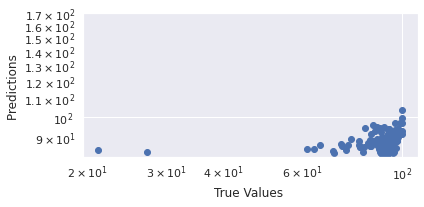

In [536]:
g=plt.scatter(Y_test, predictions)
#g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')



In [535]:
denormalized(Y_train), denormalized(model.predict(X_train))

(6       92.513528
 22      91.073175
 162     93.469431
 126     92.545911
 21      75.903707
 15      88.005642
 20      89.940851
 75      86.131336
 3       84.082943
 130    100.000000
 19      98.535603
 89      80.608270
 103     93.530250
 96      84.950229
 37      93.369947
 8       95.269820
 30      82.708302
 118     92.693316
 51      21.128950
 34      97.936079
 161     81.845562
 140     90.507752
 84      93.270953
 0       85.151218
 156     93.877842
 55      96.240386
 165     96.957442
 33      93.366726
 50      92.043656
 36      94.018752
 86      73.033227
 41     100.000000
 23      96.383178
 124     90.945148
 13      96.420145
 99      92.473066
 152     93.293151
 43      74.943433
 111     87.906601
 102     92.666518
 9       94.192752
 87      95.517615
 100     61.480105
 92      95.050422
 78      94.266583
 116     96.000117
 121     93.065740
 77      93.222014
 27      89.427821
 47      93.325528
 169     89.694652
 11      94.205012
 104     96.

In [36]:
for i, res in zip(model.predict(X_train), Y_train):
    print(i, res)

90.71410126233677 99.99999999999928
82.32589701510996 89.15635455855958
84.01593346386696 86.61987604461928
78.88850024316515 90.7920679398663
80.81685075942715 92.38748744422821
78.05088962421237 87.2460824064149
78.08930834429498 87.96485091108892
90.43587957148134 80.93577351212062
84.9352135588847 94.31681810638807
85.30501475828905 86.59561544979378
79.49347284658451 76.98212644365874
80.72261616290832 53.935943138900456
90.65113838669525 95.54711069293795
83.57921890029402 92.73064424558507
84.87345443486792 95.46112969172262
83.24158132370695 56.479555390104096
85.21920537603611 92.4164214200624
80.29298802902515 90.54901700484595
85.25518644921499 96.30282303059559
82.88722236591771 74.95369202041331
88.03905381383413 91.4964375633819
80.69583295880338 86.06001511645766
92.87899110443297 97.22781172657272
78.35242137794906 86.93392792123063
93.62616666762852 97.38317094656715
85.7456899245594 93.07375323121067
86.5141185174645 70.50433898803223
87.96293446393373 90.145445628476

In [487]:
Y_test

119    97.005458
Name: Recovered_percent, dtype: float64

In [485]:
Y.shape

(115,)

# Arbre

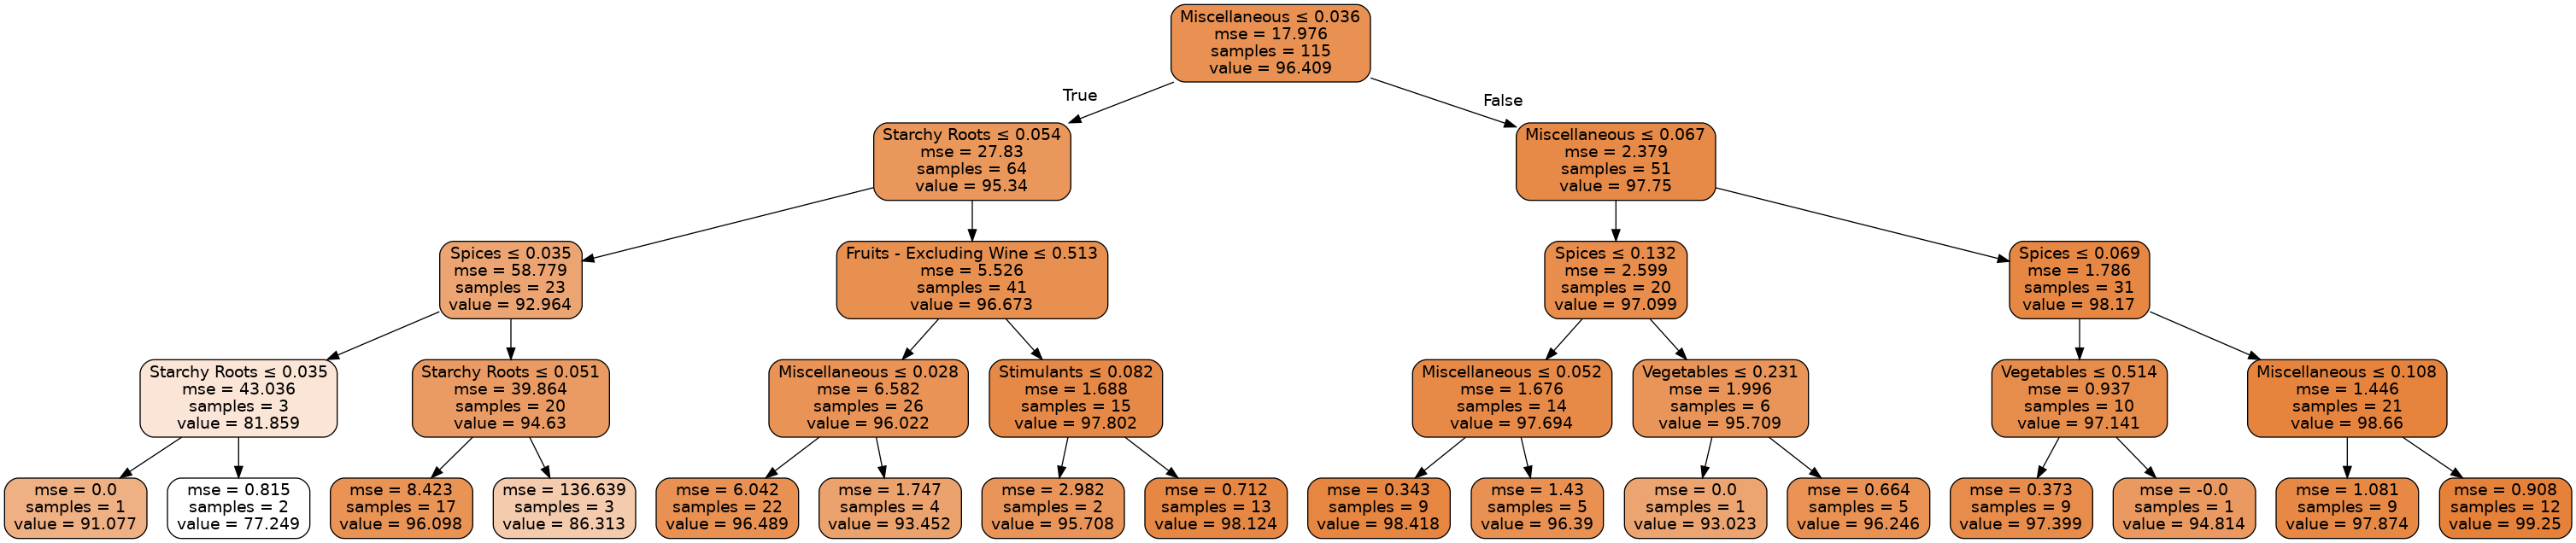

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor(max_depth=4)
# Train Decision Tree Classifer

X = frame_food[columns[0:7]]
Y = X[name_y]
X = X.drop(name_y, axis = 1)


clf = clf.fit(X, Y)

#Predict the response for test dataset





from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor(max_depth=4)
x = frame.drop(columns=[name_y])
y = frame[name_y]
# Train Decision Tree Classifer
clf = clf.fit(x, y)

#Predict the response for test dataset





from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


ValueError: could not convert string to float: 'Afghanistan'

# Meilleur regression avec groupby

[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144  70 133 119  84  43  56  65   1  39  15  17  13
 140  42  71 126  72  90 157 135  67]
0.40053764933827873


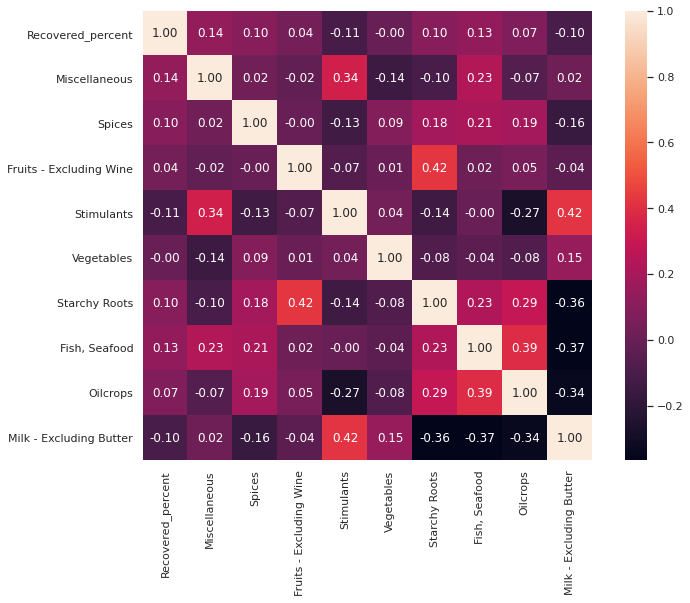

Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
[ 77 158  21  66  87  97 137  23  10 145]
1.674014310529677


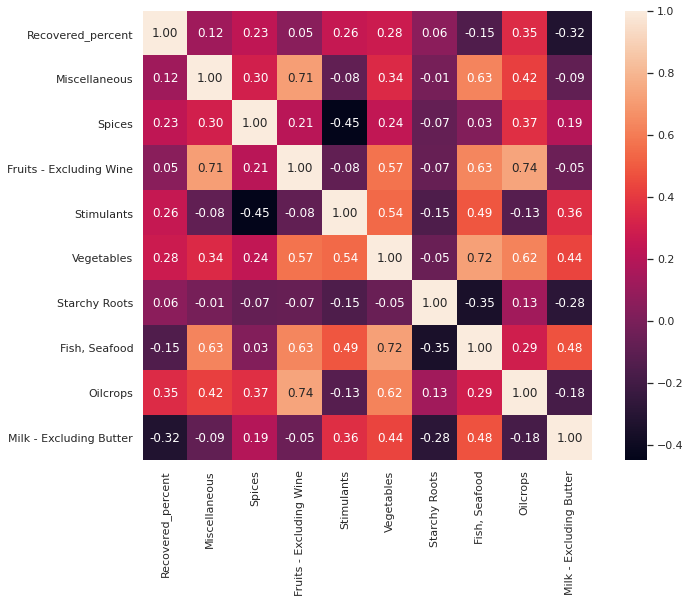

Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
[125 122  74 159  35  95 123  18]
2.1755808136444674


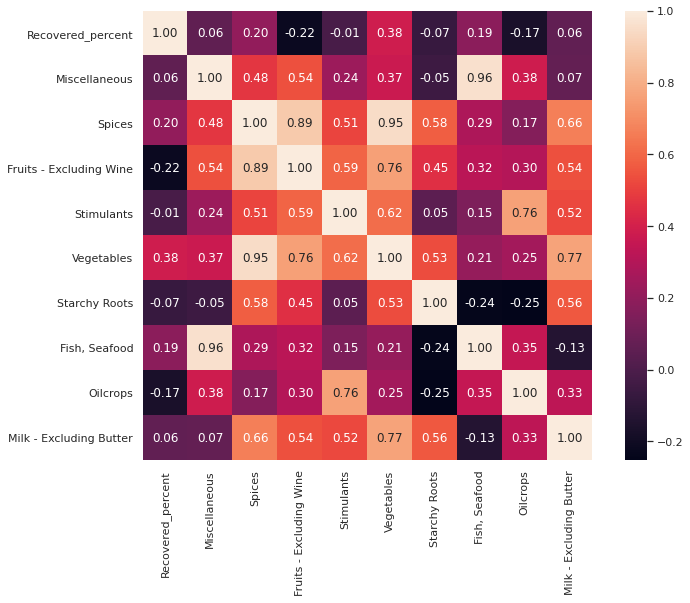

Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
[114  55  31  33   8 116 124 108 138  20]
2.5729089386356727


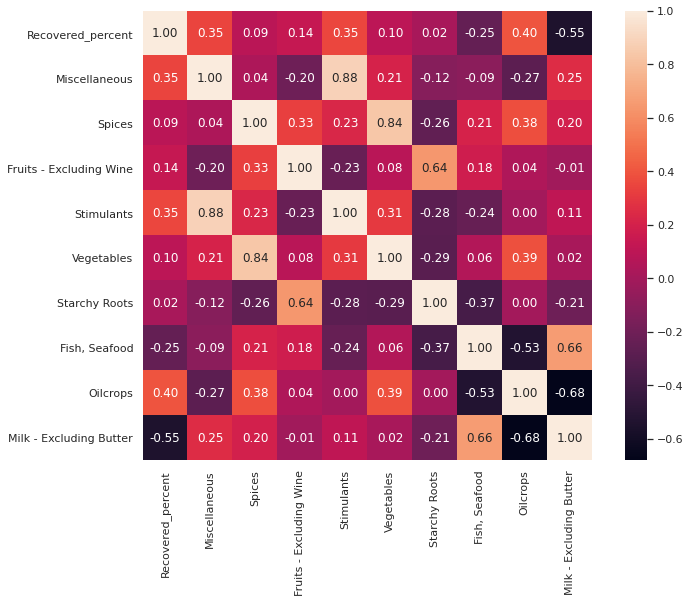

Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
[120  83   5 141 146  51]
3.0791183691140103


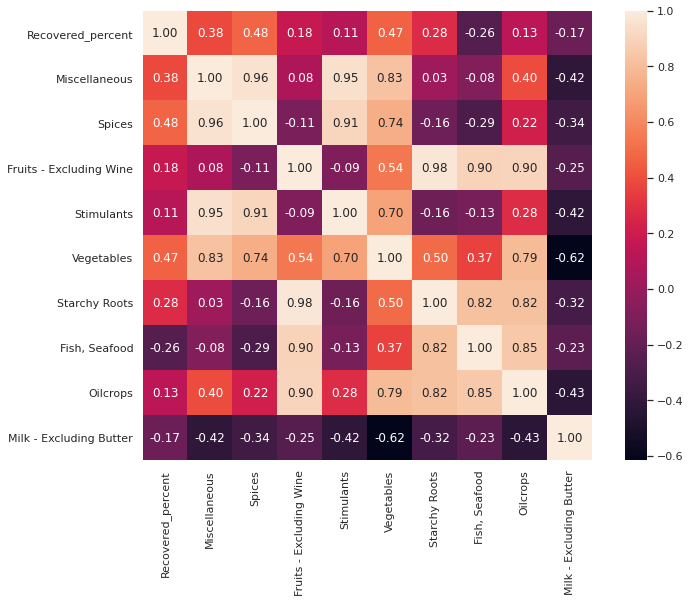

Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
[161 118  73]
3.51123515506004


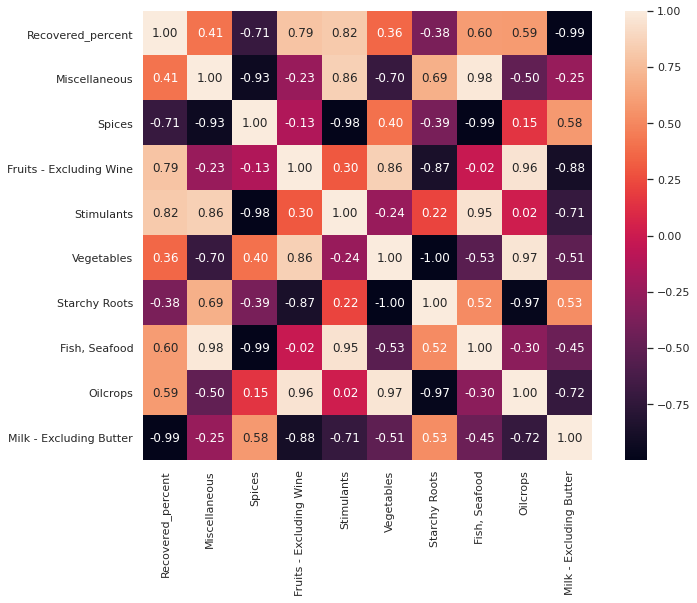

Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
[6]
4.07506765899865


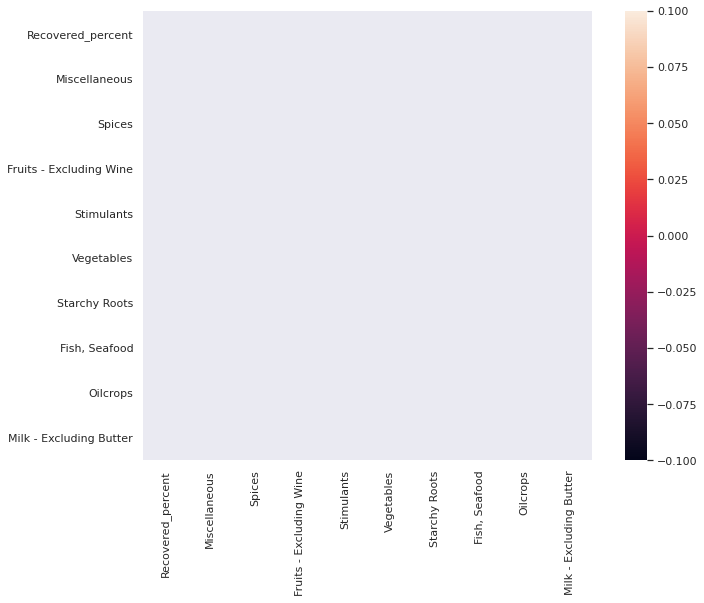

Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')
Index(['Recovered_percent', 'Miscellaneous', 'Spices', 'Fruits - Excluding Wine', 'Stimulants', 'Vegetables', 'Starchy Roots', 'Fish, Seafood', 'Oilcrops', 'Milk - Excluding Butter'], dtype='object')


<ipython-input-69-ba43669b69f8>:31: RuntimeWarning: invalid value encountered in true_divide
  normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [69]:
for ind in grouped_index:
    big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
    print(ind)
    print(np.mean(frame.loc[ind]["Confirmed"]))
    
    current_frame = frame.loc[ind]
    frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Obesity",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])

    a4_dims = (11.7, 8.27)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    columns = correlation.nlargest(10, name_y).index

    correlation_map = np.corrcoef(frame_food[columns].values.T)
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
    plt.show(ax)

    
    
    X = frame_food[columns[0:7]]
    Y = X[name_y].values

    a = 0
    b = 100
    print(columns)
    d = Y
    min_d = np.min(d)
    max_d = np.max(d)
    normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

    def denormalized(x):
        return (x / (b - a)) * (max_d - min_d) + min_d 



    X = X.drop(name_y, axis = 1).values

    Y = normalized_d
    ind = Y != 0 

    X = X[ind,]
    Y = Y[ind]


    a = 0
    b = 100
    print(columns)
    d = Y
    min_d = np.min(d)
    max_d = np.max(d)
    normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

    Y = normalized_d


    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)
    normalized_d





In [ ]:
# Preprocess 
# Verifier dataFrame 1 a 1 Choix un seul
# Animal product, Vegetal product c'est resumé des autres colonnes. Multipliée par 2
# 

#1°) Faire matrice correlation meilleur recovered
#2°) Faire meilleur regression avec tout 
#3°) Remarquer que c'est etrange 
#4°) Faire meilleur regression sur differents group

In [39]:
for i in range(0, len(frame_food)):
    print(sum(frame_food.drop(columns=["Obesity", "Vegetal Products", "Animal Products"]).iloc[i]))

KeyError: "['Obesity' 'Vegetal Products' 'Animal Products'] not found in axis"

In [40]:
len(frame.groupby("Country").mean())

159

# Kmeans

In [110]:

kmeans = KMeans(n_clusters=10, random_state=0).fit(frame_food.to_numpy())
kmeans.labels_
c = kmeans.cluster_centers_



In [111]:
def entity_distance(ent1, ent2):
    return np.linalg.norm(ent1-ent2)


distances = np.ones((len(c), len(c)), dtype=np.float)
print(distances.shape)
for i in range(len(c)):
    for j in range(len(c)):
        if i < j:
            continue
        distances[i, j] = entity_distance(c[i], c[j])

for i in range(len(c)):
    for j in range(len(c)):
        if i < j:
            distances[i, j] = distances[j, i]
pd.DataFrame(distances)

(10, 10)


0          1          2          3          4          5          6          7          8          9
0   0.000000  44.238555  19.861582  29.424819  18.154422  30.120263  18.944236  39.174666  24.314245  38.093835
1  44.238555   0.000000  28.062249  29.636578  37.936867  26.437233  44.653589  19.409262  27.797397  20.251237
2  19.861582  28.062249   0.000000  27.331407  21.007886  19.548121  26.881668  30.728201  17.350907  19.177678
3  29.424819  29.636578  27.331407   0.000000  30.822088  31.090277  29.718638  19.760340  27.507494  37.886099
4  18.154422  37.936867  21.007886  30.822088   0.000000  21.597916  23.628906  30.784841  11.606689  31.681645
5  30.120263  26.437233  19.548121  31.090277  21.597916   0.000000  28.427201  26.608033  12.321560  21.522967
6  18.944236  44.653589  26.881668  29.718638  23.628906  28.427201   0.000000  38.251456  25.832895  41.755433
7  39.174666  19.409262  30.728201  19.760340  30.784841  26.608033  38.251456   0.000000  23.497924  31.281237
8  24.314245  27.797397  17.350907  27.507494  11.606689  12.321560  25.832895  23.497924   0.000000  23.299179
9  38.093835  20.251237  19.177678  37.886099  31.681645  21.522967  41.755433  31.281237  23.299179   0.000000

In [24]:
ass = kmeans.labels_
data = frame.to_numpy()

In [25]:
data.T[:,0].shape, data[0].shape

((189,), (189,))

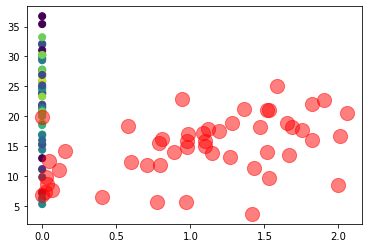

In [26]:
plt.scatter(frame.to_numpy()[:, 0][0:50], frame.to_numpy()[:, 1][0:50], c=ass[0:50], s=50, cmap='viridis')



centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);



(1, 10)
(1, 4)
(1, 4)


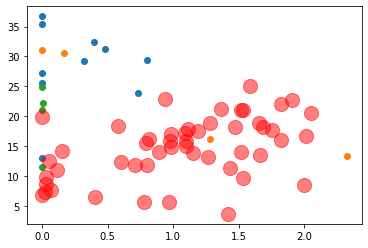

In [27]:
for k in range(3):
    print(data.T[0,np.where(ass==k)][:,0:10].shape)
    plt.scatter(data.T[0,np.where(ass==k)][:,0:10],data.T[1,np.where(ass==k)][:,0:10])
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);


In [30]:
len(frame.columns)

189

In [ ]:
for i in range(len(frame.columns)):
    for j in range(len(frame.columns)):
        for k in range(3):
            print(data.T[0,np.where(ass==k)][:,0:10].shape)
            plt.scatter(data.T[i,np.where(ass==k)][:,0:10],data.T[j,np.where(ass==k)][:,0:10])
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
        plt.show()


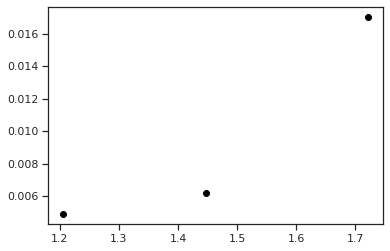

In [51]:
#for k in range(3):
#    plt.scatter(data.T[0,np.where(ass==k)],data.T[1,np.where(ass==k)])
#plt.scatter(init_v[:,0],init_v[:,1],color='lightblue')
plt.scatter(c[:,2],c[:,3],color='black')


0 3


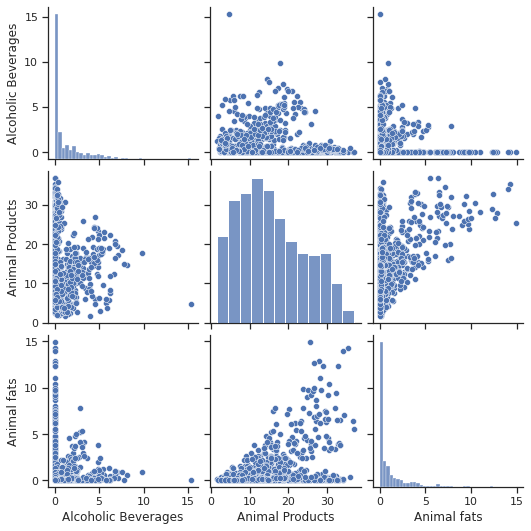

3 6


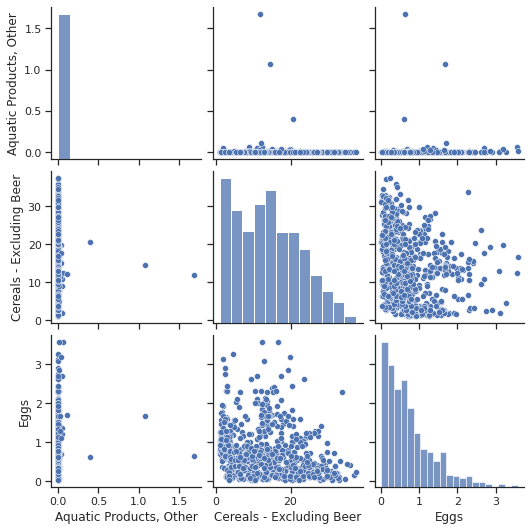

6 9


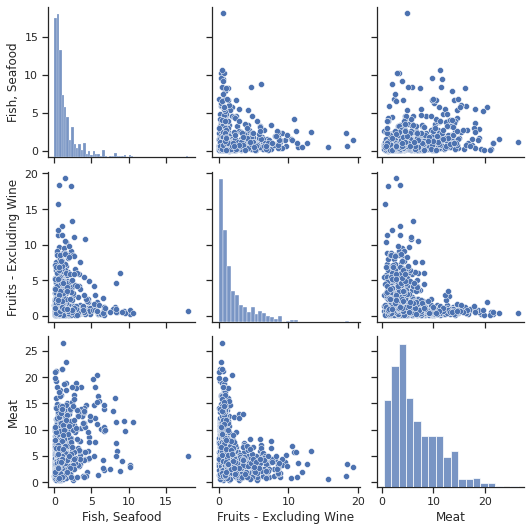

9 12


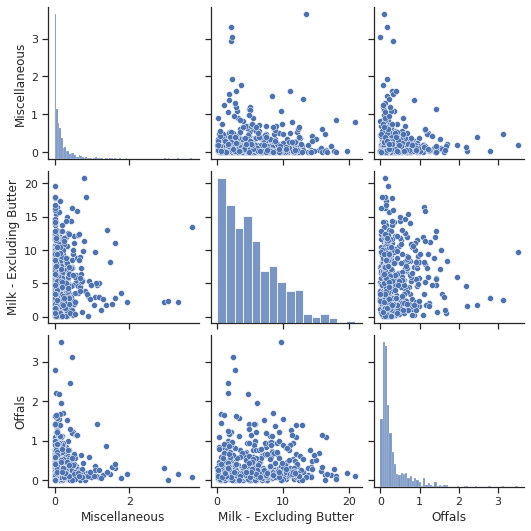

12 15


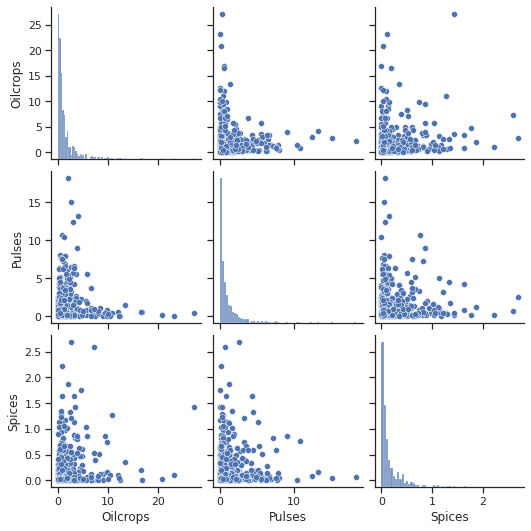

15 18


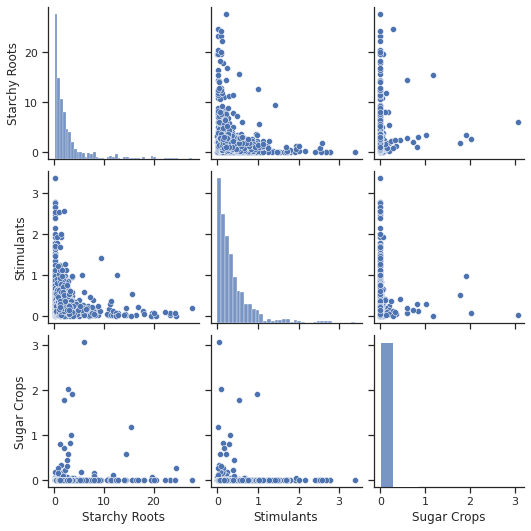

18 21


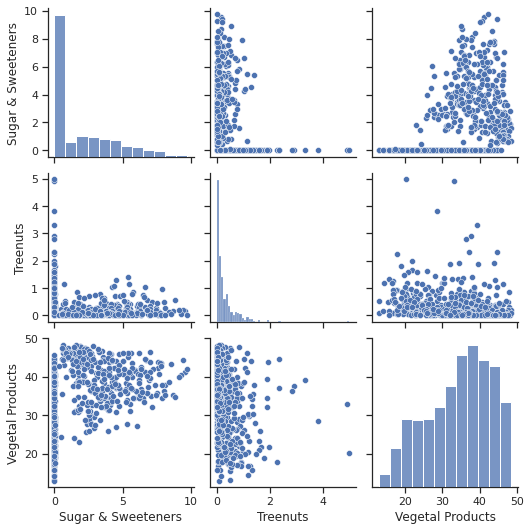

21 24


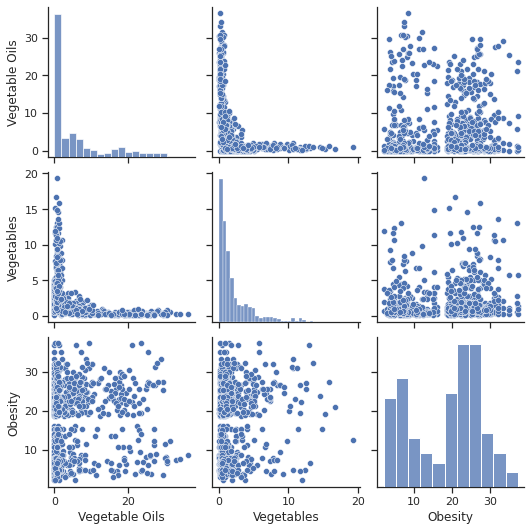

24 27


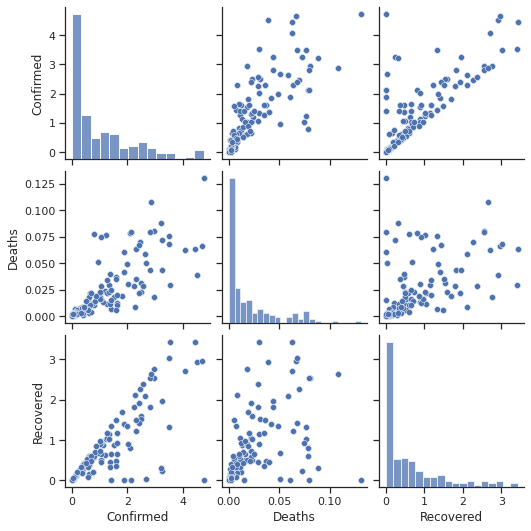

In [23]:

sns.set_theme(style="ticks")
prec = 0
for i in range(3,29,3):
    print(prec, i)
    sns.pairplot(frame[frame.columns[prec:i]])
    prec = i
    plt.show()


In [76]:
frame.to_numpy()[:,0]

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'China', 'Colombia', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamai

In [71]:
kmeans.cluster_centers_.shape

(3, 188)

# Brouillon

In [31]:
fus = []
for i in range(0, 3):
    fus += list(grouped_index.pop(0))
grouped_index[0] = fus + list(grouped_index[0])
len(grouped_index)

7

<ipython-input-11-2999e622fbaf>:53: RuntimeWarning: Mean of empty slice.
  ax.text3D(X[y == label, 3].mean(),
/home/brami/env2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-11-2999e622fbaf>:54: RuntimeWarning: Mean of empty slice.
  X[y == label, 0].mean(),
<ipython-input-11-2999e622fbaf>:55: RuntimeWarning: Mean of empty slice.
  X[y == label, 2].mean() + 2, name,


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

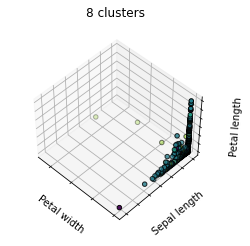

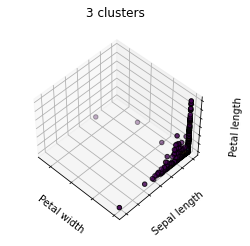

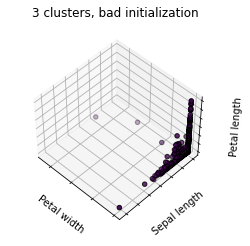

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


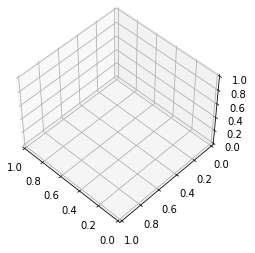

In [11]:


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = frame.drop(columns=[name_y]).to_numpy()
y = frame[name_y].to_numpy()

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()
